<a href="https://colab.research.google.com/github/ReginaAbedrop/Actividad-1/blob/main/Actividad_1_UF3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Actividad 1**
#Regina Abedrop Payro 
#A01702211

#Preprocesamiento

In [328]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [329]:
#Cargar archivo csv desde equipo
#from google.colab import files
#files.upload()

In [330]:
df= pd.read_csv("listings.csv")
df.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,35797,https://www.airbnb.com/rooms/35797,20220922013610,2022-09-22,city scrape,Villa Dante,"Dentro de Villa un estudio de arte con futon, ...","Centro comercial Santa Fe, parque interlomas y...",https://a0.muscache.com/pictures/f395ab78-1185...,153786,...,NaN,NaN,NaN,NaN,f,1,1,0,0,NaN
1,783480,https://www.airbnb.com/rooms/783480,20220922013610,2022-09-22,city scrape,"Area Sta.Fe,IberoABC Hospital Rooms",<b>The space</b><br />Two beautifully furnishe...,The neighborhood is very quiet. There are smal...,https://a0.muscache.com/pictures/12600230/eec8...,4129056,...,4.93,4.70,4.85,NaN,t,2,0,2,0,0.26
2,796477,https://www.airbnb.com/rooms/796477,20220922013610,2022-09-23,city scrape,Classic but Modern Apartment in Condesa,Spacious and comfortable room on historic buil...,Condesa is surrounded by important museums and...,https://a0.muscache.com/pictures/58251607/70e9...,4195771,...,4.91,4.96,4.71,NaN,f,1,0,1,0,1.52
3,44616,https://www.airbnb.com/rooms/44616,20220922013610,2022-09-23,city scrape,CONDESA HAUS B&B,A new concept of hosting in mexico through a b...,NaN,https://a0.muscache.com/pictures/251410/ec75fe...,196253,...,4.75,4.98,4.47,NaN,f,12,3,2,0,0.44
4,817291,https://www.airbnb.com/rooms/817291,20220922013610,2022-09-22,city scrape,Live Mexico City Like a Small Town,"Beautiful and cozy apartment in Mexico City, w...",Please check the guidebook. We have posted man...,https://a0.muscache.com/pictures/556d81f5-5aef...,4017148,...,4.95,4.63,4.78,NaN,f,1,1,0,0,0.51


In [331]:
#Quitar signo de porcentaje y de pesos de las columnas "host_acceptance_rate" y "price" para poder utilizarlas como variables numericas
df["host_acceptance_rate"] = df["host_acceptance_rate"].str.replace("%","")
df["price"] = df["price"].str.replace("$","")
df["price"] = df["price"].str.replace(",","")
df["host_acceptance_rate"] = pd.to_numeric(df["host_acceptance_rate"])
df["price"] = pd.to_numeric(df["price"])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  This is separate from the ipykernel package so we can avoid doing imports until


In [332]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22948 entries, 0 to 22947
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            22948 non-null  int64  
 1   listing_url                                   22948 non-null  object 
 2   scrape_id                                     22948 non-null  int64  
 3   last_scraped                                  22948 non-null  object 
 4   source                                        22948 non-null  object 
 5   name                                          22945 non-null  object 
 6   description                                   21921 non-null  object 
 7   neighborhood_overview                         14532 non-null  object 
 8   picture_url                                   22948 non-null  object 
 9   host_id                                       22948 non-null 

Separar en 3 DataFrames

In [333]:
df['room_type'].unique()

array(['Entire home/apt', 'Private room', 'Hotel room', 'Shared room'],
      dtype=object)

In [334]:
df2=df.copy()

In [335]:
df2 = df[['host_acceptance_rate','number_of_reviews','price','availability_365','review_scores_rating','review_scores_cleanliness','review_scores_communication','room_type']]
df2.head()

,host_acceptance_rate,number_of_reviews,price,availability_365,review_scores_rating,review_scores_cleanliness,review_scores_communication,room_type
0,NaN,0,4001.0,363,NaN,NaN,NaN,Entire home/apt
1,100.0,27,500.0,363,4.96,4.93,4.93,Private room
2,67.0,144,599.0,323,4.73,4.70,4.91,Private room
3,79.0,58,18000.0,331,4.59,4.70,4.75,Entire home/apt
4,100.0,61,740.0,314,4.85,4.80,4.95,Entire home/apt


In [336]:
entire_home=df2[df2['room_type']=='Entire home/apt']
private_room = df2[df2["room_type"] == "Private room"]
hotel_room = df2[df2["room_type"] == "Hotel room"]

In [337]:
entire_home.head()

,host_acceptance_rate,number_of_reviews,price,availability_365,review_scores_rating,review_scores_cleanliness,review_scores_communication,room_type
0,NaN,0,4001.0,363,NaN,NaN,NaN,Entire home/apt
3,79.0,58,18000.0,331,4.59,4.70,4.75,Entire home/apt
4,100.0,61,740.0,314,4.85,4.80,4.95,Entire home/apt
5,92.0,76,650.0,354,4.88,4.92,4.93,Entire home/apt
6,100.0,51,1441.0,319,4.45,4.54,4.72,Entire home/apt


In [338]:
private_room.head()

,host_acceptance_rate,number_of_reviews,price,availability_365,review_scores_rating,review_scores_cleanliness,review_scores_communication,room_type
1,100.0,27,500.0,363,4.96,4.93,4.93,Private room
2,67.0,144,599.0,323,4.73,4.70,4.91,Private room
8,79.0,58,1198.0,175,4.91,4.91,4.95,Private room
16,NaN,0,1360.0,88,NaN,NaN,NaN,Private room
18,62.0,127,440.0,297,4.73,4.67,4.92,Private room


In [339]:
hotel_room.head()

,host_acceptance_rate,number_of_reviews,price,availability_365,review_scores_rating,review_scores_cleanliness,review_scores_communication,room_type
22,88.0,31,1098.0,348,4.97,4.94,5.0,Hotel room
24,0.0,9,600.0,364,4.89,5.00,5.0,Hotel room
26,88.0,44,998.0,345,4.98,4.91,5.0,Hotel room
31,88.0,19,998.0,327,4.95,4.95,5.0,Hotel room
45,79.0,7,2860.0,347,4.71,5.00,5.0,Hotel room


#Tratamiento de Nulos

Reemplazare los valores nulos de los dataframes con con el promedio

Empezare por tratar los datos nulos de los DataFrames

In [340]:
# DataFrame entire_home
valores_nulos_entire=entire_home.isnull().sum()
valores_nulos_entire

host_acceptance_rate           1068
number_of_reviews                 0
price                             0
availability_365                  0
review_scores_rating           1693
review_scores_cleanliness      1727
review_scores_communication    1728
room_type                         0
dtype: int64

In [341]:
# DataFrame entire_home
entire_home=entire_home.fillna(round(df.mean(),1))
# Verificar si ya no hay valores nulos
valores_nulos_entire=entire_home.isnull().sum()
valores_nulos_entire

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


host_acceptance_rate           0
number_of_reviews              0
price                          0
availability_365               0
review_scores_rating           0
review_scores_cleanliness      0
review_scores_communication    0
room_type                      0
dtype: int64

In [342]:
# DataFrame private_room
valores_nulos_private=private_room.isnull().sum()
valores_nulos_private

host_acceptance_rate           1319
number_of_reviews                 0
price                             0
availability_365                  0
review_scores_rating           2203
review_scores_cleanliness      2258
review_scores_communication    2257
room_type                         0
dtype: int64

In [343]:
# DataFrame private_room
private_room = private_room.fillna(round(df.mean(),1))
#Corroboramos valores nulos
valores_nulos_private=private_room.isnull().sum()
valores_nulos_private

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


host_acceptance_rate           0
number_of_reviews              0
price                          0
availability_365               0
review_scores_rating           0
review_scores_cleanliness      0
review_scores_communication    0
room_type                      0
dtype: int64

In [344]:
#DataFrame hotel_room
valores_nulos_hotel=hotel_room.isnull().sum()
valores_nulos_hotel

host_acceptance_rate            6
number_of_reviews               0
price                           0
availability_365                0
review_scores_rating           32
review_scores_cleanliness      33
review_scores_communication    33
room_type                       0
dtype: int64

In [345]:
# DataFrame hotel_room
hotel_room = hotel_room.fillna(round(df.mean(),1))
#Corroboramos valores nulos
valores_nulos_hotel=hotel_room.isnull().sum()
valores_nulos_hotel

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


host_acceptance_rate           0
number_of_reviews              0
price                          0
availability_365               0
review_scores_rating           0
review_scores_cleanliness      0
review_scores_communication    0
room_type                      0
dtype: int64

#Tratamiento de Outliers

Ahora limpiare los outliers de los DataFrames

In [346]:
#Método aplicando Cuartiles. Encuentro cuartiles 0.25 y 0.75
## DataFrame entire_home
y1=entire_home

percentile25=y1.quantile(0.25) #Q1
percentile75=y1.quantile(0.75) #Q3
iqr= percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 4.5*iqr
Limite_Inferior_iqr= percentile25 - 4.5*iqr
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite inferior permitido", Limite_Inferior_iqr)

Limite superior permitido host_acceptance_rate            131.500
number_of_reviews               250.500
price                          6173.500
availability_365               1295.500
review_scores_rating              6.020
review_scores_cleanliness         6.185
review_scores_communication       5.900
dtype: float64
Limite inferior permitido host_acceptance_rate             61.500
number_of_reviews              -199.500
price                         -3596.500
availability_365               -814.500
review_scores_rating              3.620
review_scores_cleanliness         3.485
review_scores_communication       3.900
dtype: float64


In [347]:
entire_home_final= entire_home[(y1<=Limite_Superior_iqr)&(y1>=Limite_Inferior_iqr)]
entire_home_final

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  """Entry point for launching an IPython kernel.


,host_acceptance_rate,number_of_reviews,price,availability_365,review_scores_rating,review_scores_cleanliness,review_scores_communication,room_type
0,89.7,0.0,4001.0,363,4.70,4.70,4.80,NaN
3,79.0,58.0,NaN,331,4.59,4.70,4.75,NaN
4,100.0,61.0,740.0,314,4.85,4.80,4.95,NaN
5,92.0,76.0,650.0,354,4.88,4.92,4.93,NaN
6,100.0,51.0,1441.0,319,4.45,4.54,4.72,NaN
...,...,...,...,...,...,...,...,...
22939,93.0,78.0,550.0,349,4.83,4.82,4.88,NaN
22942,100.0,10.0,390.0,343,4.90,4.90,5.00,NaN
22945,100.0,28.0,5041.0,348,4.89,4.96,4.93,NaN
22946,99.0,72.0,1100.0,361,4.44,4.64,4.29,NaN


In [348]:
#Reemplazamos valores atípicos (nulos) del dataframe con "mean" 
entire_home_final=entire_home_final.fillna(round(entire_home_final.mean(),1))
entire_home_final

,host_acceptance_rate,number_of_reviews,price,availability_365,review_scores_rating,review_scores_cleanliness,review_scores_communication,room_type
0,89.7,0.0,4001.0,363,4.70,4.70,4.80,NaN
3,79.0,58.0,1404.8,331,4.59,4.70,4.75,NaN
4,100.0,61.0,740.0,314,4.85,4.80,4.95,NaN
5,92.0,76.0,650.0,354,4.88,4.92,4.93,NaN
6,100.0,51.0,1441.0,319,4.45,4.54,4.72,NaN
...,...,...,...,...,...,...,...,...
22939,93.0,78.0,550.0,349,4.83,4.82,4.88,NaN
22942,100.0,10.0,390.0,343,4.90,4.90,5.00,NaN
22945,100.0,28.0,5041.0,348,4.89,4.96,4.93,NaN
22946,99.0,72.0,1100.0,361,4.44,4.64,4.29,NaN


In [349]:
#Método aplicando Cuartiles. Encuentro cuartiles 0.25 y 0.75
## DataFrame private_room
y2=private_room

percentile25=y2.quantile(0.25) #Q1
percentile75=y2.quantile(0.75) #Q3
iqr= percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 4.5*iqr
Limite_Inferior_iqr= percentile25 - 4.5*iqr
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite inferior permitido", Limite_Inferior_iqr)

Limite superior permitido host_acceptance_rate            146.350
number_of_reviews               110.000
price                          2573.875
availability_365               1315.000
review_scores_rating              6.185
review_scores_cleanliness         6.350
review_scores_communication       5.900
dtype: float64
Limite inferior permitido host_acceptance_rate             43.350
number_of_reviews               -90.000
price                         -1478.625
availability_365               -805.000
review_scores_rating              3.485
review_scores_cleanliness         3.350
review_scores_communication       3.900
dtype: float64


In [350]:
private_room_final= private_room[(y2<=Limite_Superior_iqr)&(y2>=Limite_Inferior_iqr)]
private_room_final

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  """Entry point for launching an IPython kernel.


,host_acceptance_rate,number_of_reviews,price,availability_365,review_scores_rating,review_scores_cleanliness,review_scores_communication,room_type
1,100.0,27.0,500.0,363,4.96,4.93,4.93,NaN
2,67.0,NaN,599.0,323,4.73,4.70,4.91,NaN
8,79.0,58.0,1198.0,175,4.91,4.91,4.95,NaN
16,89.7,0.0,1360.0,88,4.70,4.70,4.80,NaN
18,62.0,NaN,440.0,297,4.73,4.67,4.92,NaN
...,...,...,...,...,...,...,...,...
22937,89.7,0.0,500.0,365,4.70,4.70,4.80,NaN
22938,100.0,9.0,210.0,365,4.89,4.78,5.00,NaN
22940,100.0,0.0,899.0,179,4.70,4.70,4.80,NaN
22941,97.0,25.0,400.0,365,4.56,4.60,4.84,NaN


In [351]:
#Reemplazamos valores atípicos (nulos) del dataframe con "mean" 
private_room_final=private_room_final.fillna(round(private_room_final.mean(),1))
private_room_final

,host_acceptance_rate,number_of_reviews,price,availability_365,review_scores_rating,review_scores_cleanliness,review_scores_communication,room_type
1,100.0,27.0,500.0,363,4.96,4.93,4.93,NaN
2,67.0,13.4,599.0,323,4.73,4.70,4.91,NaN
8,79.0,58.0,1198.0,175,4.91,4.91,4.95,NaN
16,89.7,0.0,1360.0,88,4.70,4.70,4.80,NaN
18,62.0,13.4,440.0,297,4.73,4.67,4.92,NaN
...,...,...,...,...,...,...,...,...
22937,89.7,0.0,500.0,365,4.70,4.70,4.80,NaN
22938,100.0,9.0,210.0,365,4.89,4.78,5.00,NaN
22940,100.0,0.0,899.0,179,4.70,4.70,4.80,NaN
22941,97.0,25.0,400.0,365,4.56,4.60,4.84,NaN


In [352]:
#Método aplicando Cuartiles. Encuentro cuartiles 0.25 y 0.75
## DataFrame hotel_room
y3=hotel_room

percentile25=y3.quantile(0.25) #Q1
percentile75=y3.quantile(0.75) #Q3
iqr= percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 4.5*iqr
Limite_Inferior_iqr= percentile25 - 4.5*iqr
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite inferior permitido", Limite_Inferior_iqr)

Limite superior permitido host_acceptance_rate            146.350
number_of_reviews               116.500
price                          8134.500
availability_365               1043.500
review_scores_rating              6.740
review_scores_cleanliness         6.440
review_scores_communication       6.305
dtype: float64
Limite inferior permitido host_acceptance_rate             43.350
number_of_reviews               -93.500
price                         -5275.500
availability_365               -481.500
review_scores_rating              2.840
review_scores_cleanliness         3.240
review_scores_communication       3.405
dtype: float64


In [353]:
hotel_room_final= hotel_room[(y3<=Limite_Superior_iqr)&(y3>=Limite_Inferior_iqr)]
hotel_room_final

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  """Entry point for launching an IPython kernel.


,host_acceptance_rate,number_of_reviews,price,availability_365,review_scores_rating,review_scores_cleanliness,review_scores_communication,room_type
22,88.0,31.0,1098.0,348,4.97,4.94,5.0,NaN
24,NaN,9.0,600.0,364,4.89,5.00,5.0,NaN
26,88.0,44.0,998.0,345,4.98,4.91,5.0,NaN
31,88.0,19.0,998.0,327,4.95,4.95,5.0,NaN
45,79.0,7.0,2860.0,347,4.71,5.00,5.0,NaN
...,...,...,...,...,...,...,...,...
10795,100.0,0.0,0.0,0,4.70,4.70,4.8,NaN
10797,89.7,0.0,0.0,0,4.70,4.70,4.8,NaN
10799,100.0,0.0,0.0,0,4.70,4.70,4.8,NaN
10801,89.7,0.0,0.0,0,4.70,4.70,4.8,NaN


In [354]:
#Reemplazamos valores atípicos (nulos) del dataframe con "mean" 
hotel_room_final=hotel_room_final.fillna(round(hotel_room_final.mean(),1))
hotel_room_final

,host_acceptance_rate,number_of_reviews,price,availability_365,review_scores_rating,review_scores_cleanliness,review_scores_communication,room_type
22,88.0,31.0,1098.0,348,4.97,4.94,5.0,NaN
24,94.1,9.0,600.0,364,4.89,5.00,5.0,NaN
26,88.0,44.0,998.0,345,4.98,4.91,5.0,NaN
31,88.0,19.0,998.0,327,4.95,4.95,5.0,NaN
45,79.0,7.0,2860.0,347,4.71,5.00,5.0,NaN
...,...,...,...,...,...,...,...,...
10795,100.0,0.0,0.0,0,4.70,4.70,4.8,NaN
10797,89.7,0.0,0.0,0,4.70,4.70,4.8,NaN
10799,100.0,0.0,0.0,0,4.70,4.70,4.8,NaN
10801,89.7,0.0,0.0,0,4.70,4.70,4.8,NaN


#Correlacion entre variables

DataFrame entire_home_final

Text(0, 0.5, 'Number of Reviews')

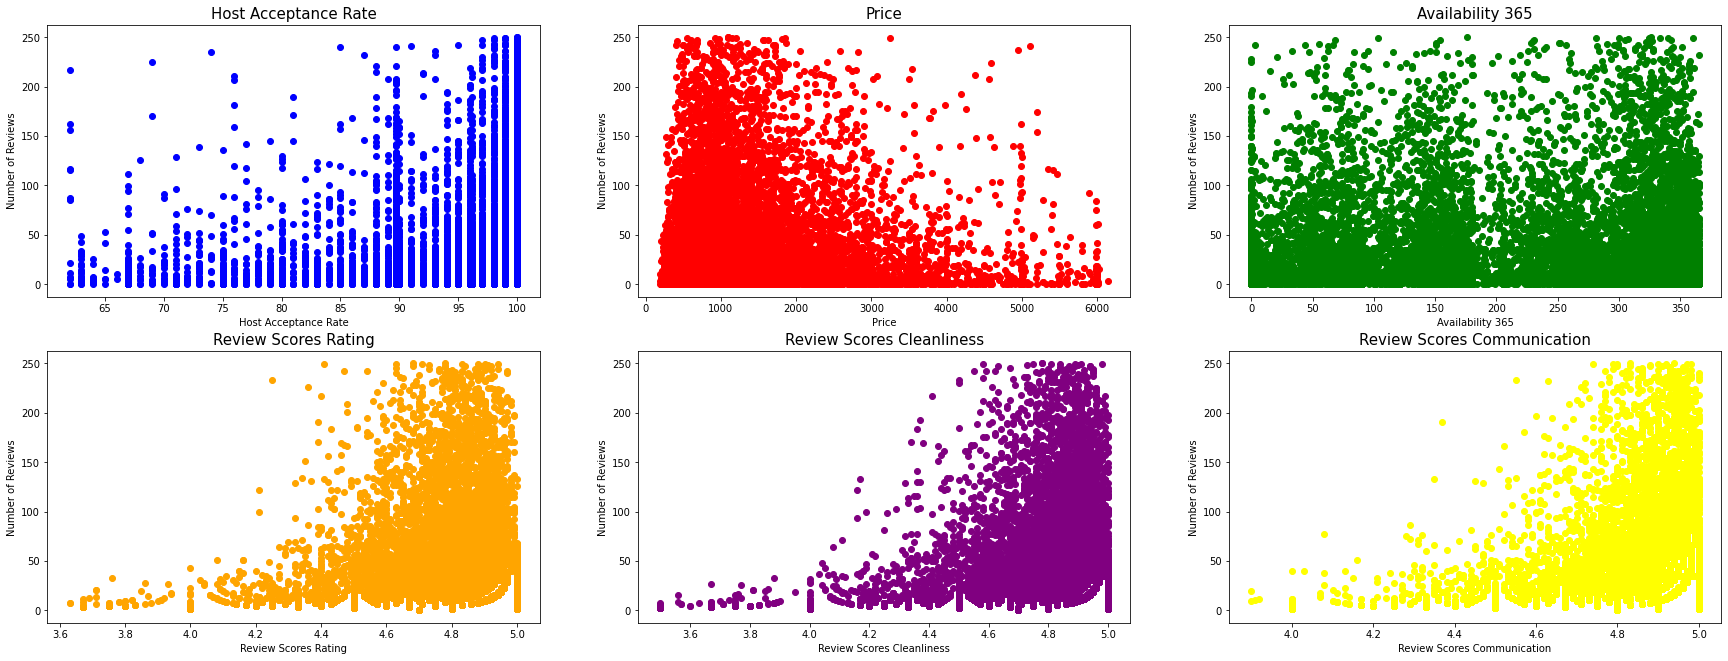

In [355]:
from turtle import color
import matplotlib.pyplot as plt
fig=plt.figure(figsize=[30,11])
ax1=fig.add_subplot(2,3,1)
ax2=fig.add_subplot(2,3,2)
ax3=fig.add_subplot(2,3,3)
ax4=fig.add_subplot(2,3,4)
ax5=fig.add_subplot(2,3,5)
ax6=fig.add_subplot(2,3,6)

ax1.set_title("Host Acceptance Rate",fontsize=15)
ax1.scatter(x='host_acceptance_rate', y='number_of_reviews', c='blue', data=entire_home_final)
ax1.set_xlabel(r'Host Acceptance Rate')
ax1.set_ylabel(r'Number of Reviews')

ax2.set_title("Price",fontsize=15)
ax2.scatter(x='price', y='number_of_reviews', color="red", data=entire_home_final)
ax2.set_xlabel(r'Price')
ax2.set_ylabel(r'Number of Reviews')

ax3.set_title("Availability 365",fontsize=15)
ax3.scatter(x='availability_365', y='number_of_reviews', color="green", data=entire_home_final)
ax3.set_xlabel(r'Availability 365')
ax3.set_ylabel(r'Number of Reviews')

ax4.set_title("Review Scores Rating",fontsize=15)
ax4.scatter(x='review_scores_rating', y='number_of_reviews', color="orange", data=entire_home_final)
ax4.set_xlabel(r'Review Scores Rating')
ax4.set_ylabel(r'Number of Reviews')

ax5.set_title("Review Scores Cleanliness",fontsize=15)
ax5.scatter(x='review_scores_cleanliness', y='number_of_reviews', color="purple", data=entire_home_final)
ax5.set_xlabel(r'Review Scores Cleanliness')
ax5.set_ylabel(r'Number of Reviews')

ax6.set_title("Review Scores Communication",fontsize=15)
ax6.scatter(x='review_scores_communication', y='number_of_reviews', color="yellow", data=entire_home_final)
ax6.set_xlabel(r'Review Scores Communication')
ax6.set_ylabel(r'Number of Reviews')

Text(0.5, 1.0, 'Correlation Heatmap')

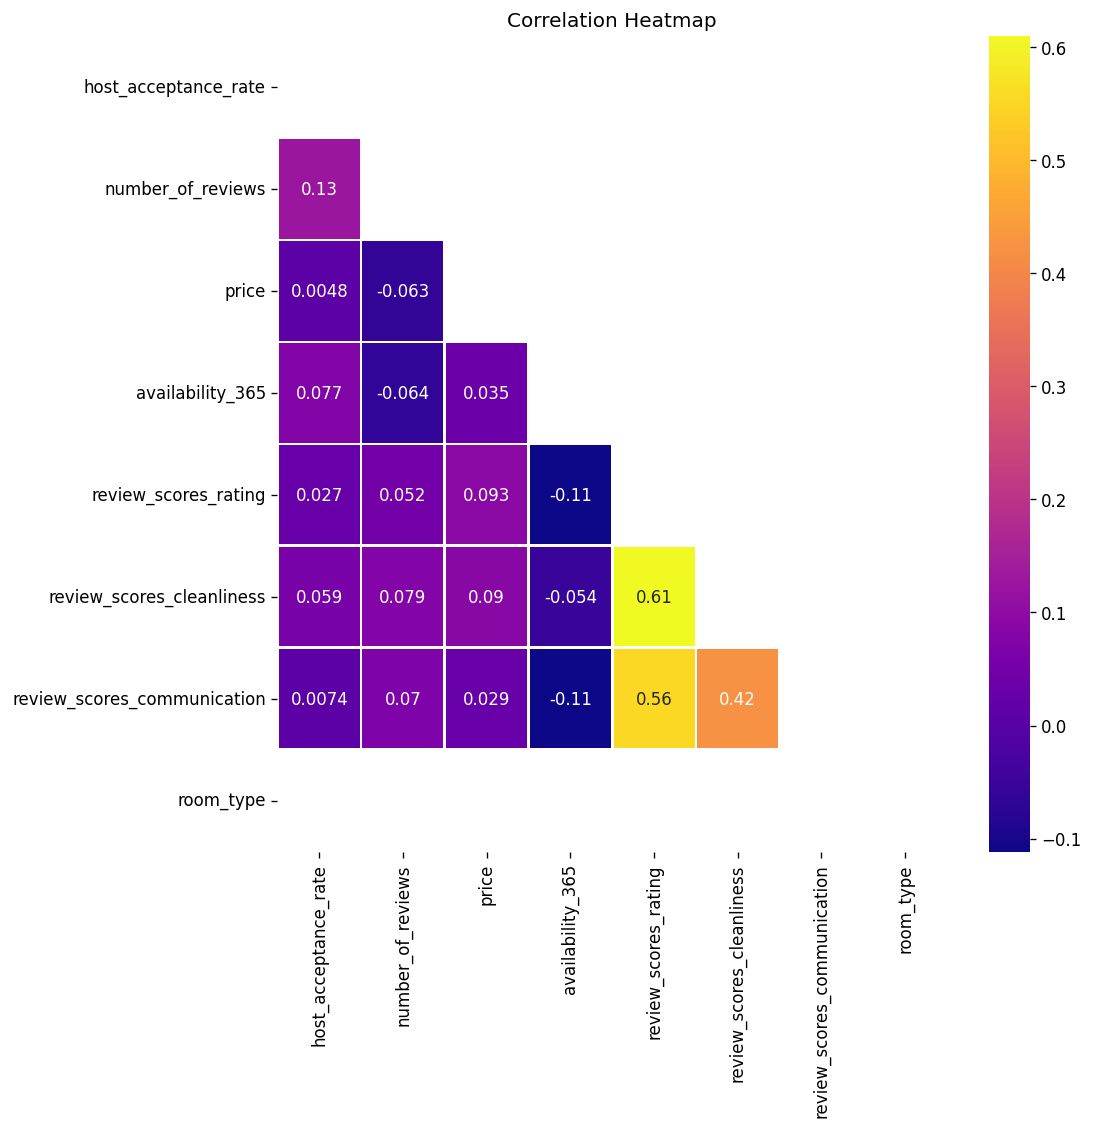

In [356]:
# Correlaciones
plt.figure(dpi=120, figsize=(9,9)) # resolution
mask = np.triu(np.ones_like(entire_home_final.corr(),dtype = bool))

sns.heatmap(entire_home_final.corr(),lw=1,cmap = 'plasma', mask=mask,  annot=True)
plt.title('Correlation Heatmap')

DataFrame private_room_final

Text(0, 0.5, 'Number of Reviews')

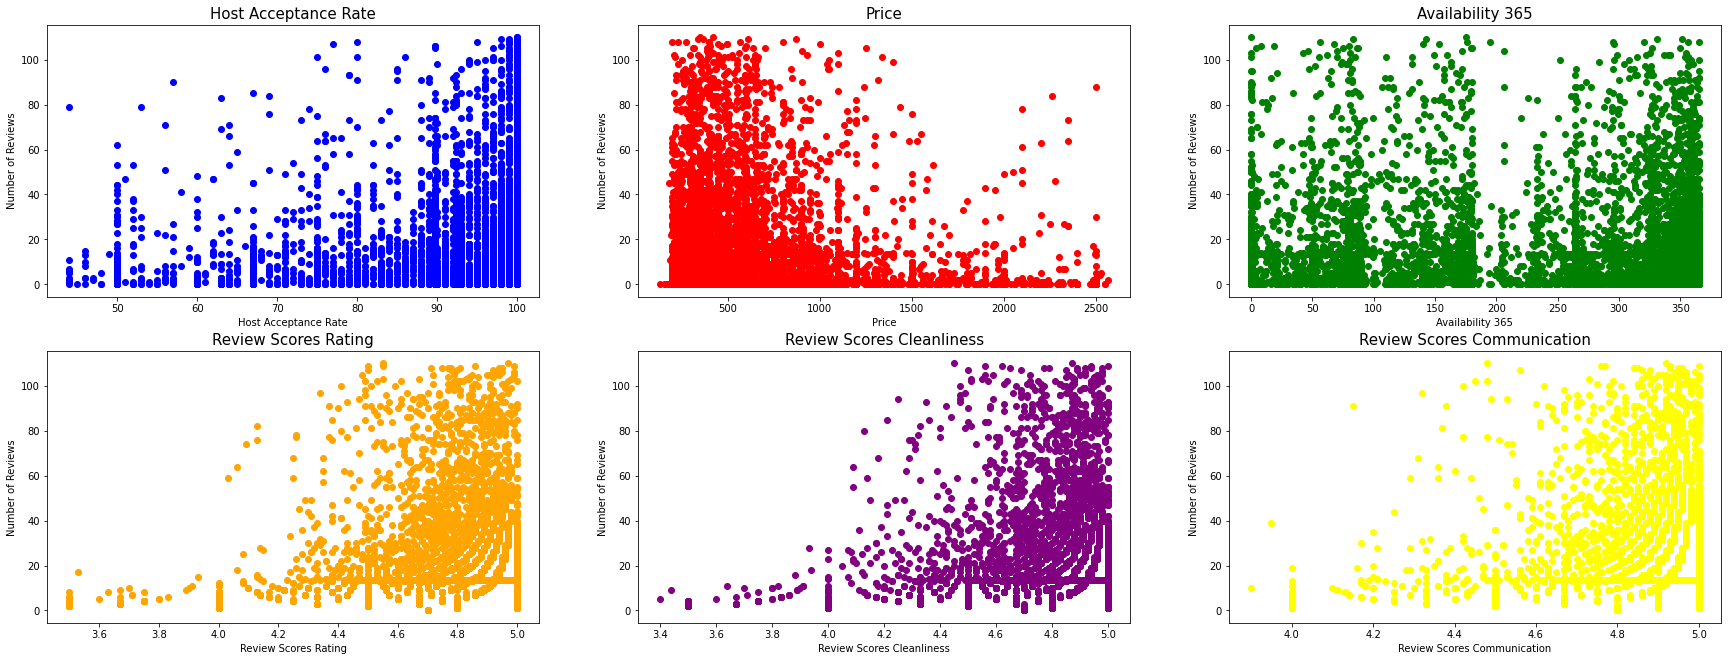

In [357]:
fig=plt.figure(figsize=[30,11])
ax1=fig.add_subplot(2,3,1)
ax2=fig.add_subplot(2,3,2)
ax3=fig.add_subplot(2,3,3)
ax4=fig.add_subplot(2,3,4)
ax5=fig.add_subplot(2,3,5)
ax6=fig.add_subplot(2,3,6)

ax1.set_title("Host Acceptance Rate",fontsize=15)
ax1.scatter(x='host_acceptance_rate', y='number_of_reviews', c='blue', data=private_room_final)
ax1.set_xlabel(r'Host Acceptance Rate')
ax1.set_ylabel(r'Number of Reviews')

ax2.set_title("Price",fontsize=15)
ax2.scatter(x='price', y='number_of_reviews', color="red", data=private_room_final)
ax2.set_xlabel(r'Price')
ax2.set_ylabel(r'Number of Reviews')

ax3.set_title("Availability 365",fontsize=15)
ax3.scatter(x='availability_365', y='number_of_reviews', color="green", data=private_room_final)
ax3.set_xlabel(r'Availability 365')
ax3.set_ylabel(r'Number of Reviews')

ax4.set_title("Review Scores Rating",fontsize=15)
ax4.scatter(x='review_scores_rating', y='number_of_reviews', color="orange", data=private_room_final)
ax4.set_xlabel(r'Review Scores Rating')
ax4.set_ylabel(r'Number of Reviews')

ax5.set_title("Review Scores Cleanliness",fontsize=15)
ax5.scatter(x='review_scores_cleanliness', y='number_of_reviews', color="purple", data=private_room_final)
ax5.set_xlabel(r'Review Scores Cleanliness')
ax5.set_ylabel(r'Number of Reviews')

ax6.set_title("Review Scores Communication",fontsize=15)
ax6.scatter(x='review_scores_communication', y='number_of_reviews', color="yellow", data=private_room_final)
ax6.set_xlabel(r'Review Scores Communication')
ax6.set_ylabel(r'Number of Reviews')

Text(0.5, 1.0, 'Correlation Heatmap')

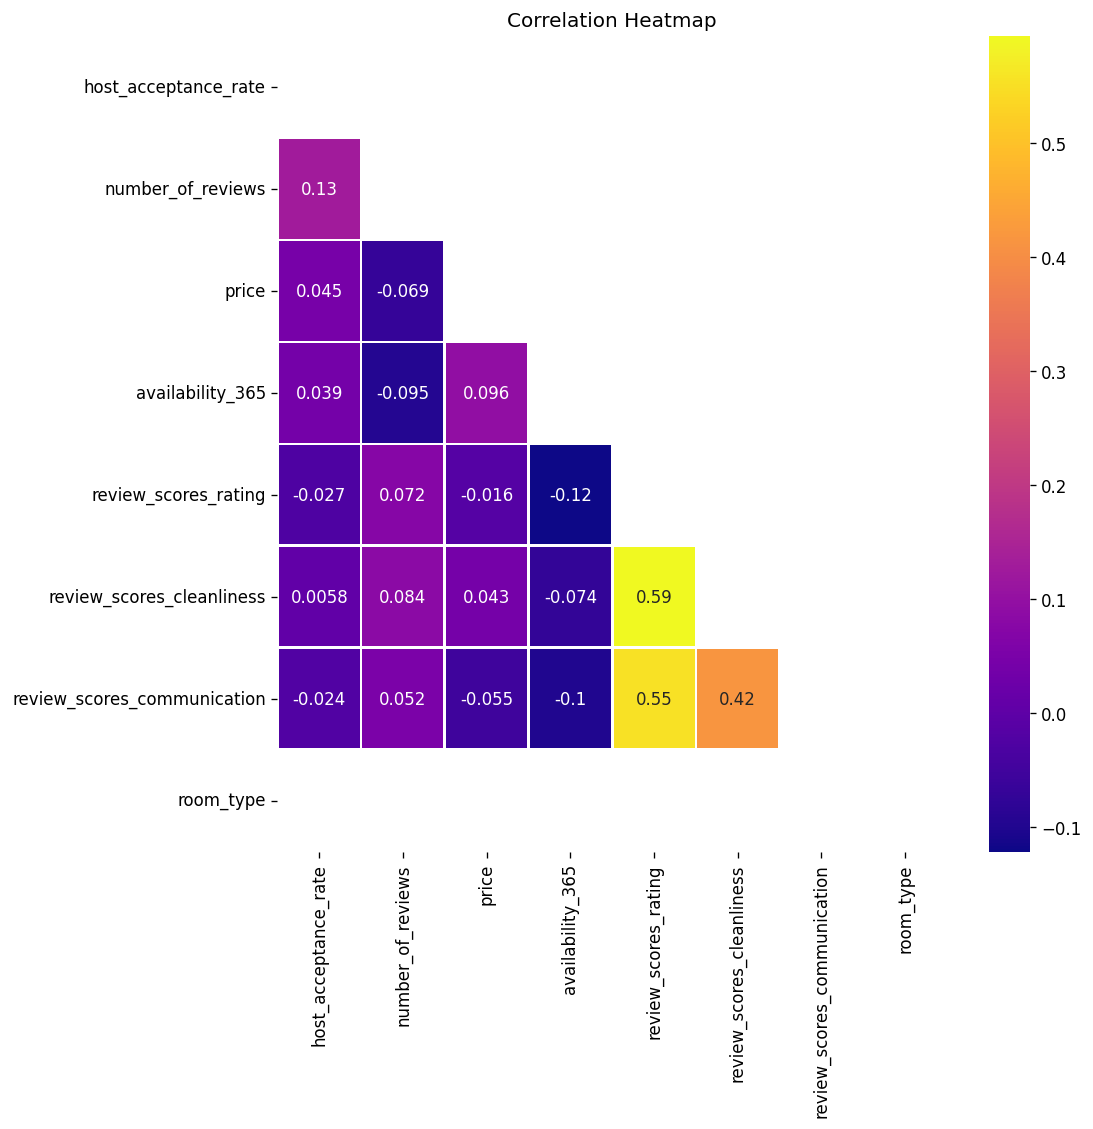

In [358]:
# Correlaciones
plt.figure(dpi=120, figsize=(9,9)) # resolution
mask = np.triu(np.ones_like(entire_home_final.corr(),dtype = bool))

sns.heatmap(private_room_final.corr(),lw=1,cmap = 'plasma', mask=mask,  annot=True)
plt.title('Correlation Heatmap')

DataFrame hotel_room_final

Text(0, 0.5, 'Number of Reviews')

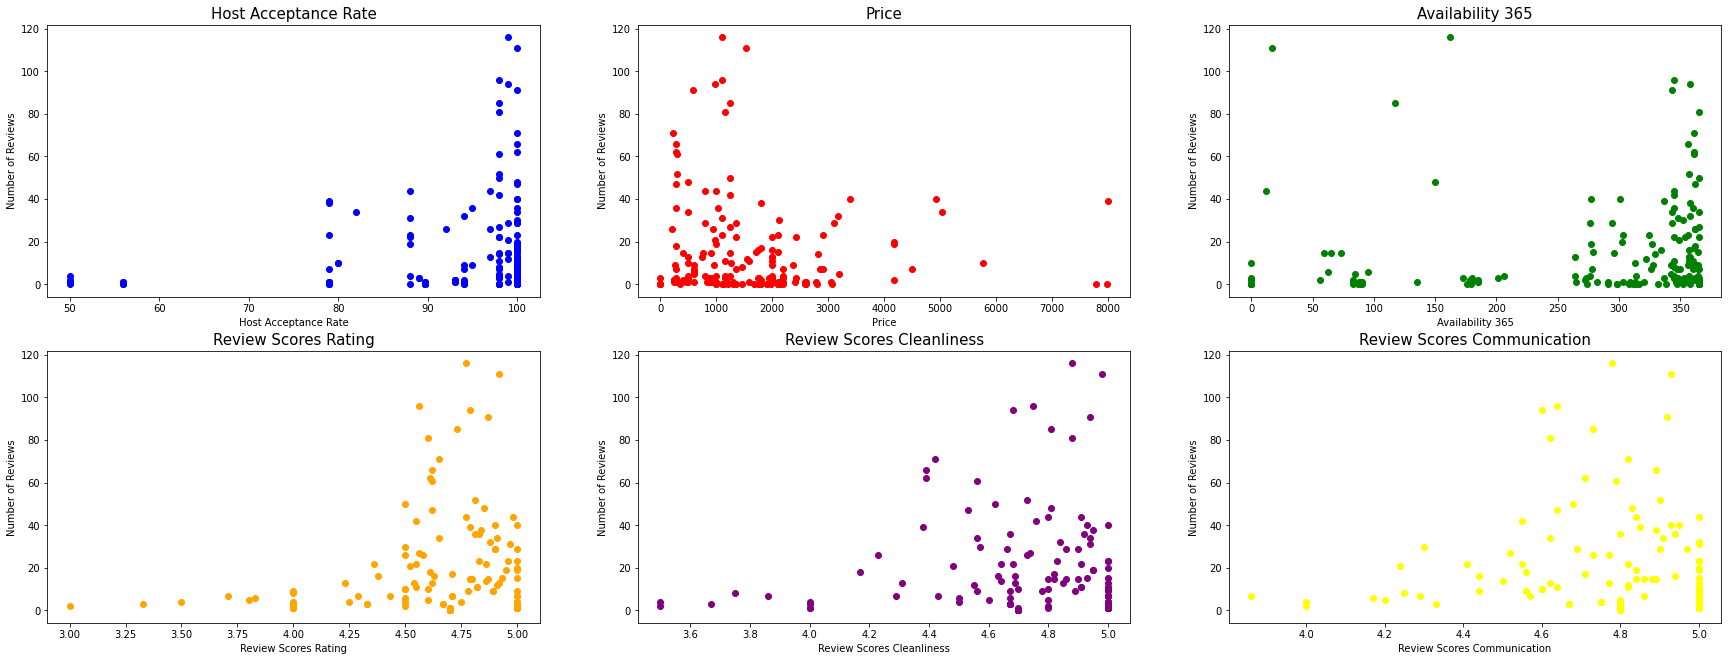

In [359]:
fig=plt.figure(figsize=[30,11])
ax1=fig.add_subplot(2,3,1)
ax2=fig.add_subplot(2,3,2)
ax3=fig.add_subplot(2,3,3)
ax4=fig.add_subplot(2,3,4)
ax5=fig.add_subplot(2,3,5)
ax6=fig.add_subplot(2,3,6)

ax1.set_title("Host Acceptance Rate",fontsize=15)
ax1.scatter(x='host_acceptance_rate', y='number_of_reviews', c='blue', data=hotel_room_final)
ax1.set_xlabel(r'Host Acceptance Rate')
ax1.set_ylabel(r'Number of Reviews')

ax2.set_title("Price",fontsize=15)
ax2.scatter(x='price', y='number_of_reviews', color="red", data=hotel_room_final)
ax2.set_xlabel(r'Price')
ax2.set_ylabel(r'Number of Reviews')

ax3.set_title("Availability 365",fontsize=15)
ax3.scatter(x='availability_365', y='number_of_reviews', color="green", data=hotel_room_final)
ax3.set_xlabel(r'Availability 365')
ax3.set_ylabel(r'Number of Reviews')

ax4.set_title("Review Scores Rating",fontsize=15)
ax4.scatter(x='review_scores_rating', y='number_of_reviews', color="orange", data=hotel_room_final)
ax4.set_xlabel(r'Review Scores Rating')
ax4.set_ylabel(r'Number of Reviews')

ax5.set_title("Review Scores Cleanliness",fontsize=15)
ax5.scatter(x='review_scores_cleanliness', y='number_of_reviews', color="purple", data=hotel_room_final)
ax5.set_xlabel(r'Review Scores Cleanliness')
ax5.set_ylabel(r'Number of Reviews')

ax6.set_title("Review Scores Communication",fontsize=15)
ax6.scatter(x='review_scores_communication', y='number_of_reviews', color="yellow", data=hotel_room_final)
ax6.set_xlabel(r'Review Scores Communication')
ax6.set_ylabel(r'Number of Reviews')

Text(0.5, 1.0, 'Correlation Heatmap')

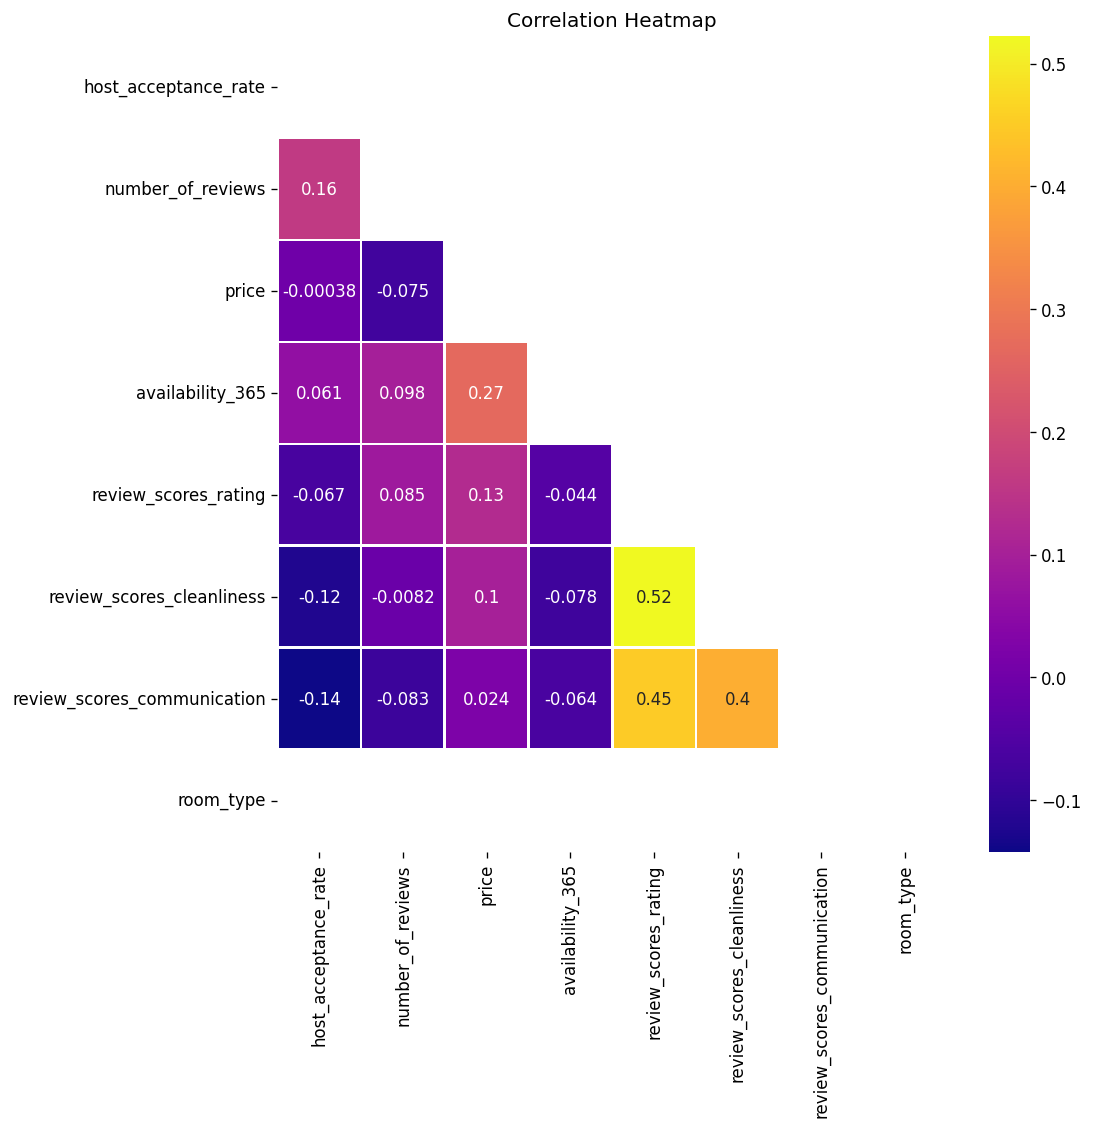

In [360]:
# Correlaciones
plt.figure(dpi=120, figsize=(9,9)) # resolution
mask = np.triu(np.ones_like(entire_home_final.corr(),dtype = bool))

sns.heatmap(hotel_room_final.corr(),lw=1,cmap = 'plasma', mask=mask,  annot=True)
plt.title('Correlation Heatmap')

##Modelo Predictivo

DataFrame entire_home_final

In [361]:
#Declaramos las variables dependientes e independientes para la regresión lineal

Vars_Indep1= entire_home_final[['host_acceptance_rate']]
Vars_Indep2= entire_home_final[['price']]
Vars_Indep3= entire_home_final[['availability_365']]
Vars_Indep4= entire_home_final[['review_scores_rating']]
Vars_Indep5= entire_home_final[['review_scores_cleanliness']]
Vars_Indep6= entire_home_final[['review_scores_communication']]

Var_Dep= entire_home_final['number_of_reviews']

In [362]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model1= LinearRegression()
model2= LinearRegression()
model3= LinearRegression()
model4= LinearRegression()
model5= LinearRegression()
model6= LinearRegression()

In [363]:
#Ajustamos el modelo con las variables antes declaradas
model1.fit(X=Vars_Indep1, y=Var_Dep)
model2.fit(X=Vars_Indep2, y=Var_Dep)
model3.fit(X=Vars_Indep3, y=Var_Dep)
model4.fit(X=Vars_Indep4, y=Var_Dep)
model5.fit(X=Vars_Indep5, y=Var_Dep)
model6.fit(X=Vars_Indep6, y=Var_Dep)

LinearRegression()

In [364]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
print('Modelo 1: ',model1.score(Vars_Indep1,Var_Dep))
print('Modelo 2: ',model2.score(Vars_Indep2,Var_Dep))
print('Modelo 3: ',model3.score(Vars_Indep3,Var_Dep))
print('Modelo 4: ',model4.score(Vars_Indep4,Var_Dep))
print('Modelo 5: ',model5.score(Vars_Indep5,Var_Dep))
print('Modelo 6: ',model6.score(Vars_Indep6,Var_Dep))

Modelo 1:  0.01574353405628026
Modelo 2:  0.003922073071446874
Modelo 3:  0.004134752305747114
Modelo 4:  0.002663317282048716
Modelo 5:  0.006304434959466976
Modelo 6:  0.004913002330805161


In [365]:
y_pred1= model1.predict(X=entire_home_final[['host_acceptance_rate']])
y_pred2= model2.predict(X=entire_home_final[['price']])
y_pred3= model3.predict(X=entire_home_final[['availability_365']])
y_pred4= model4.predict(X=entire_home_final[['review_scores_rating']])
y_pred5= model5.predict(X=entire_home_final[['review_scores_cleanliness']])
y_pred6= model6.predict(X=entire_home_final[['review_scores_communication']])

In [366]:
#Insertamos la columna de predicciones en el DataFrame
entire_home_final.insert(0, 'Predicciones 1', y_pred1)
entire_home_final.insert(0, 'Predicciones 2', y_pred2)
entire_home_final.insert(0, 'Predicciones 3', y_pred3)
entire_home_final.insert(0, 'Predicciones 4', y_pred4)
entire_home_final.insert(0, 'Predicciones 5', y_pred5)
entire_home_final.insert(0, 'Predicciones 6', y_pred6)
entire_home_final

,Predicciones 6,Predicciones 5,Predicciones 4,Predicciones 3,Predicciones 2,Predicciones 1,host_acceptance_rate,number_of_reviews,price,availability_365,review_scores_rating,review_scores_cleanliness,review_scores_communication,room_type
0,33.314782,33.030287,33.717128,31.524709,26.278321,28.705101,89.7,0.0,4001.0,363,4.70,4.70,4.80,NaN
3,32.343635,33.030287,32.461933,32.316315,34.627665,19.015426,79.0,58.0,1404.8,331,4.59,4.70,4.75,NaN
4,36.228225,34.700823,35.428757,32.736855,36.765653,38.032546,100.0,61.0,740.0,314,4.85,4.80,4.95,NaN
5,35.839766,36.705466,35.771083,31.747348,37.055092,30.787929,92.0,76.0,650.0,354,4.88,4.92,4.93,NaN
6,31.760946,30.357430,30.864413,32.613167,34.511246,38.032546,100.0,51.0,1441.0,319,4.45,4.54,4.72,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22939,34.868618,35.034931,35.200540,31.871036,37.376691,31.693506,93.0,78.0,550.0,349,4.83,4.82,4.88,NaN
22942,37.199372,36.371359,35.999300,32.019462,37.891248,38.032546,100.0,10.0,390.0,343,4.90,4.90,5.00,NaN
22945,35.839766,37.373681,35.885191,31.895774,22.933695,38.032546,100.0,28.0,5041.0,348,4.89,4.96,4.93,NaN
22946,23.409078,32.027966,30.750304,31.574184,35.607898,37.126969,99.0,72.0,1100.0,361,4.44,4.64,4.29,NaN


Text(0, 0.5, 'Number of reviews')

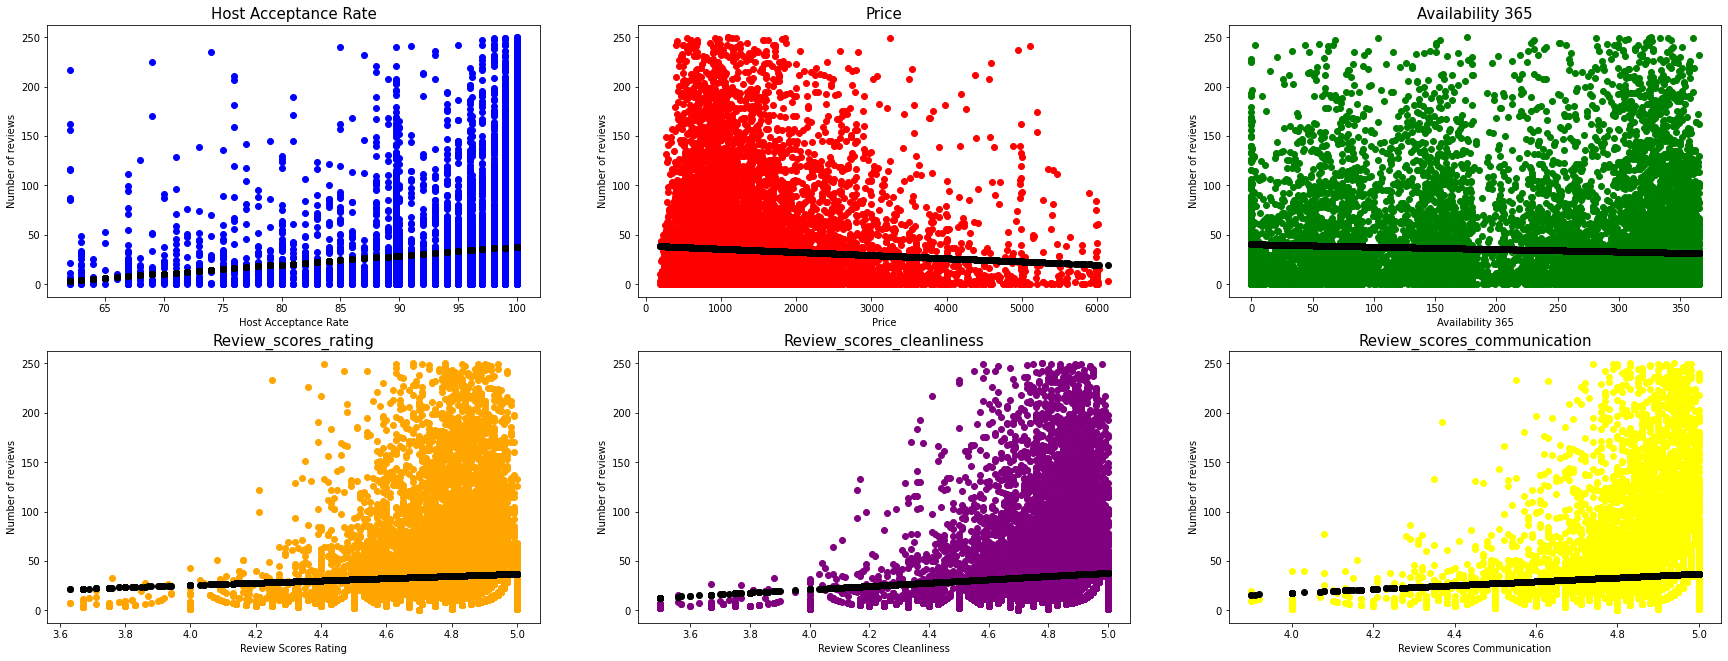

In [367]:
from turtle import color
import matplotlib.pyplot as plt
fig=plt.figure(figsize=[30,11])
ax1=fig.add_subplot(2,3,1)
ax2=fig.add_subplot(2,3,2)
ax3=fig.add_subplot(2,3,3)
ax4=fig.add_subplot(2,3,4)
ax5=fig.add_subplot(2,3,5)
ax6=fig.add_subplot(2,3,6)

ax1.set_title("Host Acceptance Rate",fontsize=15)
ax1.scatter(x='host_acceptance_rate', y='number_of_reviews', c='blue', data=entire_home_final)
ax1.scatter(x='host_acceptance_rate', y='Predicciones 1', c='black', data=entire_home_final)
ax1.set_xlabel(r'Host Acceptance Rate')
ax1.set_ylabel(r'Number of reviews')


ax2.set_title("Price",fontsize=15)
ax2.scatter(x='price', y='number_of_reviews', color="red", data=entire_home_final)
ax2.scatter(x='price', y='Predicciones 2', color="black", data=entire_home_final)
ax2.set_xlabel(r'Price')
ax2.set_ylabel(r'Number of reviews')

ax3.set_title("Availability 365",fontsize=15)
ax3.scatter(x='availability_365', y='number_of_reviews', color="green", data=entire_home_final)
ax3.scatter(x='availability_365', y='Predicciones 3', color="black", data=entire_home_final)
ax3.set_xlabel(r'Availability 365')
ax3.set_ylabel(r'Number of reviews')

ax4.set_title("Review_scores_rating",fontsize=15)
ax4.scatter(x='review_scores_rating', y='number_of_reviews', color="orange", data=entire_home_final)
ax4.scatter(x='review_scores_rating', y='Predicciones 4', color="black", data=entire_home_final)
ax4.set_xlabel(r'Review Scores Rating')
ax4.set_ylabel(r'Number of reviews')

ax5.set_title("Review_scores_cleanliness",fontsize=15)
ax5.scatter(x='review_scores_cleanliness', y='number_of_reviews', color="purple", data=entire_home_final)
ax5.scatter(x='review_scores_cleanliness', y='Predicciones 5', color="black", data=entire_home_final)
ax5.set_xlabel(r'Review Scores Cleanliness')
ax5.set_ylabel(r'Number of reviews')

ax6.set_title("Review_scores_communication",fontsize=15)
ax6.scatter(x='review_scores_communication', y='number_of_reviews', color="yellow", data=entire_home_final)
ax6.scatter(x='review_scores_communication', y='Predicciones 6', color="black", data=entire_home_final)
ax6.set_xlabel(r'Review Scores Communication')
ax6.set_ylabel(r'Number of reviews')

In [368]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter1=model1.score(X=Vars_Indep1, y=Var_Dep)
coef_Deter2=model2.score(X=Vars_Indep2, y=Var_Dep)
coef_Deter3=model3.score(X=Vars_Indep3, y=Var_Dep)
coef_Deter4=model4.score(X=Vars_Indep4, y=Var_Dep)
coef_Deter5=model5.score(X=Vars_Indep5, y=Var_Dep)
coef_Deter6=model6.score(X=Vars_Indep6, y=Var_Dep)
print('Coeficientes de determinación')

print('Modelo 1: ',coef_Deter1)
print('Modelo 2: ',coef_Deter2)
print('Modelo 3: ',coef_Deter3)
print('Modelo 4: ',coef_Deter4)
print('Modelo 5: ',coef_Deter5)
print('Modelo 6: ',coef_Deter6)

Coeficientes de determinación
Modelo 1:  0.01574353405628026
Modelo 2:  0.003922073071446874
Modelo 3:  0.004134752305747114
Modelo 4:  0.002663317282048716
Modelo 5:  0.006304434959466976
Modelo 6:  0.004913002330805161


DataFrame private_room_final

In [369]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep11= private_room_final[['host_acceptance_rate']]
Vars_Indep22= private_room_final[['price']]
Vars_Indep33= private_room_final[['availability_365']]
Vars_Indep44= private_room_final[['review_scores_rating']]
Vars_Indep55= private_room_final[['review_scores_cleanliness']]
Vars_Indep66= private_room_final[['review_scores_communication']]

Var_Dep1= private_room_final['number_of_reviews']

In [370]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model11= LinearRegression()
model22= LinearRegression()
model33= LinearRegression()
model44= LinearRegression()
model55= LinearRegression()
model66= LinearRegression()

In [371]:
#Ajustamos el modelo con las variables antes declaradas
model11.fit(X=Vars_Indep11, y=Var_Dep1)
model22.fit(X=Vars_Indep22, y=Var_Dep1)
model33.fit(X=Vars_Indep33, y=Var_Dep1)
model44.fit(X=Vars_Indep44, y=Var_Dep1)
model55.fit(X=Vars_Indep55, y=Var_Dep1)
model66.fit(X=Vars_Indep66, y=Var_Dep1)

LinearRegression()

In [372]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
print('Modelo 1: ',model11.score(Vars_Indep11,Var_Dep1))
print('Modelo 2: ',model22.score(Vars_Indep22,Var_Dep1))
print('Modelo 3: ',model33.score(Vars_Indep33,Var_Dep1))
print('Modelo 4: ',model44.score(Vars_Indep44,Var_Dep1))
print('Modelo 5: ',model55.score(Vars_Indep55,Var_Dep1))
print('Modelo 6: ',model66.score(Vars_Indep66,Var_Dep1))

Modelo 1:  0.01646728608664816
Modelo 2:  0.0047635291563492554
Modelo 3:  0.009095157853566405
Modelo 4:  0.005204271391699988
Modelo 5:  0.00708562986696315
Modelo 6:  0.00275336647171176


In [373]:
y_pred11= model11.predict(X=private_room_final[['host_acceptance_rate']])
y_pred22= model22.predict(X=private_room_final[['price']])
y_pred33= model33.predict(X=private_room_final[['availability_365']])
y_pred44= model44.predict(X=private_room_final[['review_scores_rating']])
y_pred55= model55.predict(X=private_room_final[['review_scores_cleanliness']])
y_pred66= model66.predict(X=private_room_final[['review_scores_communication']])

In [374]:
#Insertamos la columna de predicciones en el DataFrame
private_room_final.insert(0, 'Predicciones 1', y_pred11)
private_room_final.insert(0, 'Predicciones 2', y_pred22)
private_room_final.insert(0, 'Predicciones 3', y_pred33)
private_room_final.insert(0, 'Predicciones 4', y_pred44)
private_room_final.insert(0, 'Predicciones 5', y_pred55)
private_room_final.insert(0, 'Predicciones 6', y_pred66)
private_room_final

,Predicciones 6,Predicciones 5,Predicciones 4,Predicciones 3,Predicciones 2,Predicciones 1,host_acceptance_rate,number_of_reviews,price,availability_365,review_scores_rating,review_scores_cleanliness,review_scores_communication,room_type
1,13.832860,14.565093,14.637192,11.566264,13.698094,15.186050,100.0,27.0,500.0,363,4.96,4.93,4.93,NaN
2,13.707210,12.833933,13.136428,12.210952,13.337354,7.304272,67.0,13.4,599.0,323,4.73,4.70,4.91,NaN
8,13.958509,14.414558,14.310939,14.596299,11.154694,10.170373,79.0,58.0,1198.0,175,4.91,4.91,4.95,NaN
16,13.016138,12.833933,12.940676,15.998496,10.564392,12.725980,89.7,0.0,1360.0,88,4.70,4.70,4.80,NaN
18,13.770035,12.608130,13.136428,12.630000,13.916725,6.110063,62.0,13.4,440.0,297,4.73,4.67,4.92,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22937,13.016138,12.833933,12.940676,11.534029,13.698094,12.725980,89.7,0.0,500.0,365,4.70,4.70,4.80,NaN
22938,14.272633,13.436076,14.180437,11.534029,14.754808,15.186050,100.0,9.0,210.0,365,4.89,4.78,5.00,NaN
22940,13.016138,12.833933,12.940676,14.531830,12.244202,15.186050,100.0,0.0,899.0,179,4.70,4.70,4.80,NaN
22941,13.267437,12.081255,12.027168,11.534029,14.062478,14.469525,97.0,25.0,400.0,365,4.56,4.60,4.84,NaN


Text(0, 0.5, 'Number of reviews')

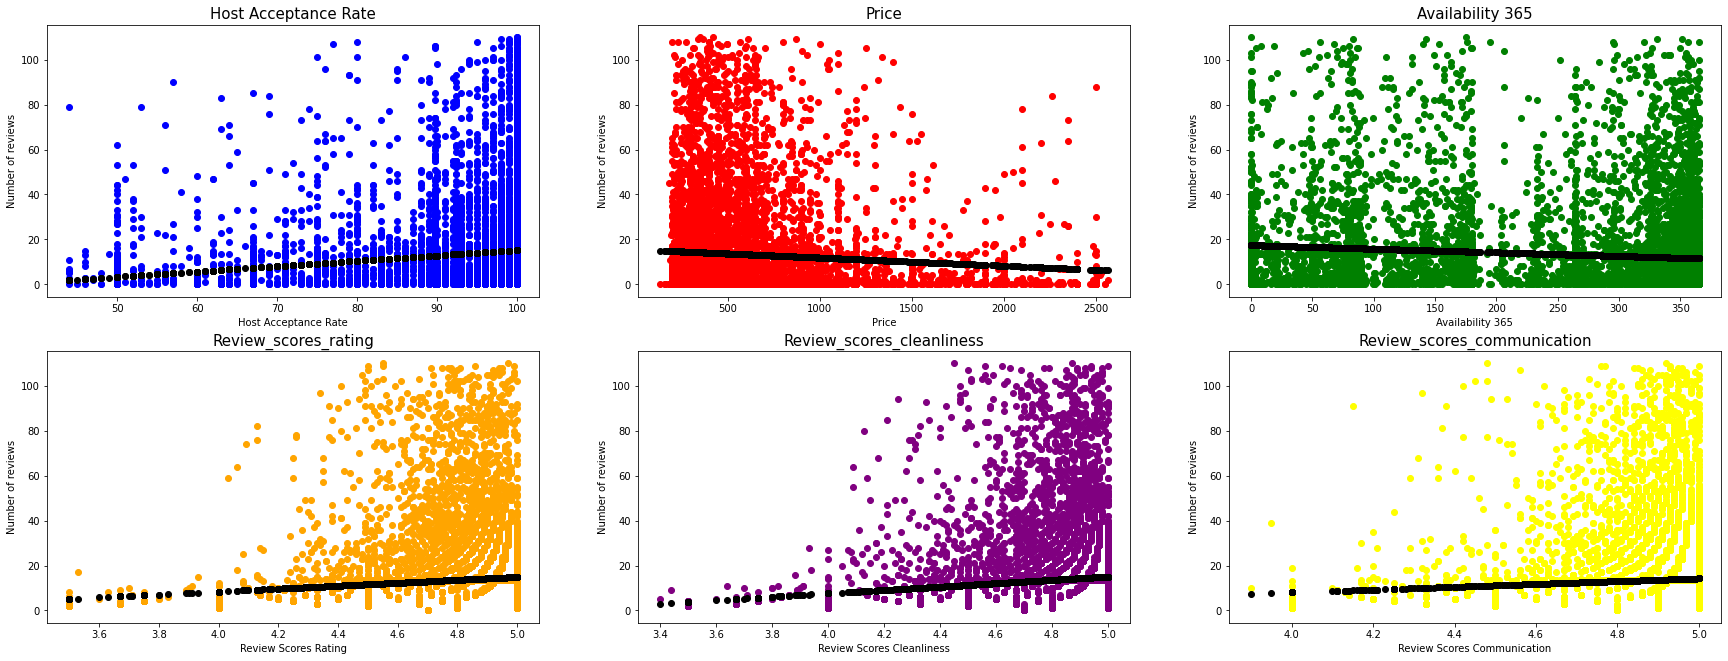

In [375]:
fig=plt.figure(figsize=[30,11])
ax1=fig.add_subplot(2,3,1)
ax2=fig.add_subplot(2,3,2)
ax3=fig.add_subplot(2,3,3)
ax4=fig.add_subplot(2,3,4)
ax5=fig.add_subplot(2,3,5)
ax6=fig.add_subplot(2,3,6)

ax1.set_title("Host Acceptance Rate",fontsize=15)
ax1.scatter(x='host_acceptance_rate', y='number_of_reviews', c='blue', data=private_room_final)
ax1.scatter(x='host_acceptance_rate', y='Predicciones 1', c='black', data=private_room_final)
ax1.set_xlabel(r'Host Acceptance Rate')
ax1.set_ylabel(r'Number of reviews')


ax2.set_title("Price",fontsize=15)
ax2.scatter(x='price', y='number_of_reviews', color="red", data=private_room_final)
ax2.scatter(x='price', y='Predicciones 2', color="black", data=private_room_final)
ax2.set_xlabel(r'Price')
ax2.set_ylabel(r'Number of reviews')

ax3.set_title("Availability 365",fontsize=15)
ax3.scatter(x='availability_365', y='number_of_reviews', color="green", data=private_room_final)
ax3.scatter(x='availability_365', y='Predicciones 3', color="black", data=private_room_final)
ax3.set_xlabel(r'Availability 365')
ax3.set_ylabel(r'Number of reviews')

ax4.set_title("Review_scores_rating",fontsize=15)
ax4.scatter(x='review_scores_rating', y='number_of_reviews', color="orange", data=private_room_final)
ax4.scatter(x='review_scores_rating', y='Predicciones 4', color="black", data=private_room_final)
ax4.set_xlabel(r'Review Scores Rating')
ax4.set_ylabel(r'Number of reviews')

ax5.set_title("Review_scores_cleanliness",fontsize=15)
ax5.scatter(x='review_scores_cleanliness', y='number_of_reviews', color="purple", data=private_room_final)
ax5.scatter(x='review_scores_cleanliness', y='Predicciones 5', color="black", data=private_room_final)
ax5.set_xlabel(r'Review Scores Cleanliness')
ax5.set_ylabel(r'Number of reviews')

ax6.set_title("Review_scores_communication",fontsize=15)
ax6.scatter(x='review_scores_communication', y='number_of_reviews', color="yellow", data=private_room_final)
ax6.scatter(x='review_scores_communication', y='Predicciones 6', color="black", data=private_room_final)
ax6.set_xlabel(r'Review Scores Communication')
ax6.set_ylabel(r'Number of reviews')

In [376]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter1=model11.score(X=Vars_Indep11, y=Var_Dep1)
coef_Deter2=model22.score(X=Vars_Indep22, y=Var_Dep1)
coef_Deter3=model33.score(X=Vars_Indep33, y=Var_Dep1)
coef_Deter4=model44.score(X=Vars_Indep44, y=Var_Dep1)
coef_Deter5=model55.score(X=Vars_Indep55, y=Var_Dep1)
coef_Deter6=model66.score(X=Vars_Indep66, y=Var_Dep1)
print('Coeficientes de determinación')

print('Modelo 1: ',coef_Deter1)
print('Modelo 2: ',coef_Deter2)
print('Modelo 3: ',coef_Deter3)
print('Modelo 4: ',coef_Deter4)
print('Modelo 5: ',coef_Deter5)
print('Modelo 6: ',coef_Deter6)

Coeficientes de determinación
Modelo 1:  0.01646728608664816
Modelo 2:  0.0047635291563492554
Modelo 3:  0.009095157853566405
Modelo 4:  0.005204271391699988
Modelo 5:  0.00708562986696315
Modelo 6:  0.00275336647171176


DataFrame hotel_room_final

In [377]:
#Declaramos las variables dependientes e independientes para la regresión lineal

Vars_Indep111= hotel_room_final[['host_acceptance_rate']]
Vars_Indep222= hotel_room_final[['price']]
Vars_Indep333= hotel_room_final[['availability_365']]
Vars_Indep444= hotel_room_final[['review_scores_rating']]
Vars_Indep555= hotel_room_final[['review_scores_cleanliness']]
Vars_Indep666= hotel_room_final[['review_scores_communication']]

Var_Dep2= hotel_room_final['number_of_reviews']

In [378]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model111= LinearRegression()
model222= LinearRegression()
model333= LinearRegression()
model444= LinearRegression()
model555= LinearRegression()
model666= LinearRegression()

In [379]:
#Ajustamos el modelo con las variables antes declaradas
model111.fit(X=Vars_Indep111, y=Var_Dep2)
model222.fit(X=Vars_Indep222, y=Var_Dep2)
model333.fit(X=Vars_Indep333, y=Var_Dep2)
model444.fit(X=Vars_Indep444, y=Var_Dep2)
model555.fit(X=Vars_Indep555, y=Var_Dep2)
model666.fit(X=Vars_Indep666, y=Var_Dep2)

LinearRegression()

In [380]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
print('Modelo 1: ',model111.score(Vars_Indep111,Var_Dep2))
print('Modelo 2: ',model222.score(Vars_Indep222,Var_Dep2))
print('Modelo 3: ',model333.score(Vars_Indep333,Var_Dep2))
print('Modelo 4: ',model444.score(Vars_Indep444,Var_Dep2))
print('Modelo 5: ',model555.score(Vars_Indep555,Var_Dep2))
print('Modelo 6: ',model666.score(Vars_Indep666,Var_Dep2))

Modelo 1:  0.025412386875031
Modelo 2:  0.005568221093487646
Modelo 3:  0.00962094385769563
Modelo 4:  0.007296842474677989
Modelo 5:  6.666077774242218e-05
Modelo 6:  0.0068660060367286


In [381]:
y_pred111= model111.predict(X=hotel_room_final[['host_acceptance_rate']])
y_pred222= model222.predict(X=hotel_room_final[['price']])
y_pred333= model333.predict(X=hotel_room_final[['availability_365']])
y_pred444= model444.predict(X=hotel_room_final[['review_scores_rating']])
y_pred555= model555.predict(X=hotel_room_final[['review_scores_cleanliness']])
y_pred666= model666.predict(X=hotel_room_final[['review_scores_communication']])

In [382]:
#Insertamos la columna de predicciones en el DataFrame
hotel_room_final.insert(0, 'Predicciones 1', y_pred111)
hotel_room_final.insert(0, 'Predicciones 2', y_pred222)
hotel_room_final.insert(0, 'Predicciones 3', y_pred333)
hotel_room_final.insert(0, 'Predicciones 4', y_pred444)
hotel_room_final.insert(0, 'Predicciones 5', y_pred555)
hotel_room_final.insert(0, 'Predicciones 6', y_pred666)
hotel_room_final

,Predicciones 6,Predicciones 5,Predicciones 4,Predicciones 3,Predicciones 2,Predicciones 1,host_acceptance_rate,number_of_reviews,price,availability_365,review_scores_rating,review_scores_cleanliness,review_scores_communication,room_type
22,13.276562,14.814788,16.532469,16.333712,15.553362,13.012256,88.0,31.0,1098.0,348,4.97,4.94,5.0,NaN
24,13.276562,14.776729,16.086427,16.650943,16.179865,14.947184,94.1,9.0,600.0,364,4.89,5.00,5.0,NaN
26,13.276562,14.833817,16.588224,16.274231,15.679166,13.012256,88.0,44.0,998.0,345,4.98,4.91,5.0,NaN
31,13.276562,14.808445,16.420959,15.917345,15.679166,13.012256,88.0,19.0,998.0,327,4.95,4.95,5.0,NaN
45,13.276562,14.776729,15.082834,16.313885,13.336702,10.157446,79.0,7.0,2860.0,347,4.71,5.00,5.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10795,15.006121,14.967022,15.027078,9.433931,16.934686,16.818671,100.0,0.0,0.0,0,4.70,4.70,4.8,NaN
10797,15.006121,14.967022,15.027078,9.433931,16.934686,13.551498,89.7,0.0,0.0,0,4.70,4.70,4.8,NaN
10799,15.006121,14.967022,15.027078,9.433931,16.934686,16.818671,100.0,0.0,0.0,0,4.70,4.70,4.8,NaN
10801,15.006121,14.967022,15.027078,9.433931,16.934686,13.551498,89.7,0.0,0.0,0,4.70,4.70,4.8,NaN


Text(0, 0.5, 'Number of reviews')

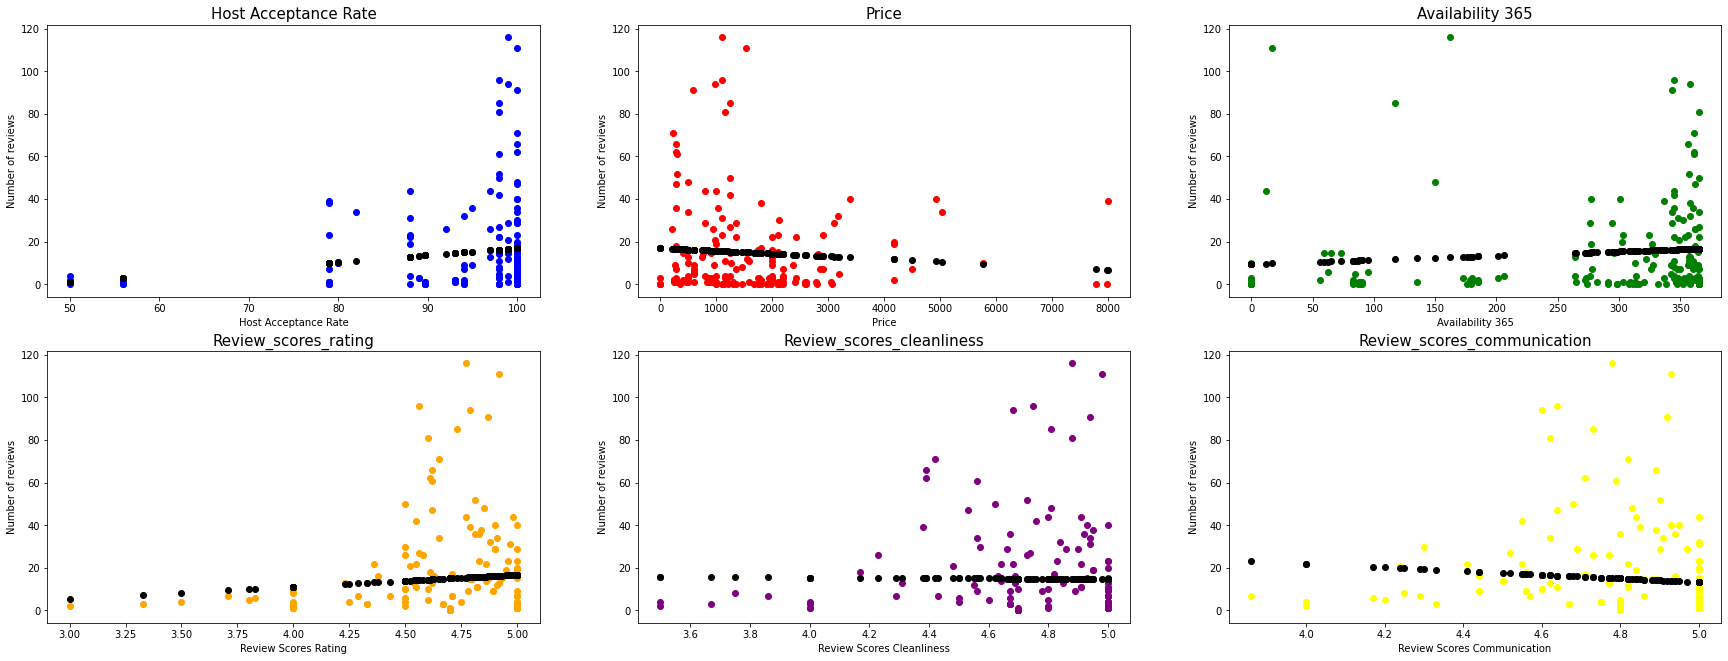

In [383]:
fig=plt.figure(figsize=[30,11])
ax1=fig.add_subplot(2,3,1)
ax2=fig.add_subplot(2,3,2)
ax3=fig.add_subplot(2,3,3)
ax4=fig.add_subplot(2,3,4)
ax5=fig.add_subplot(2,3,5)
ax6=fig.add_subplot(2,3,6)

ax1.set_title("Host Acceptance Rate",fontsize=15)
ax1.scatter(x='host_acceptance_rate', y='number_of_reviews', c='blue', data=hotel_room_final)
ax1.scatter(x='host_acceptance_rate', y='Predicciones 1', c='black', data=hotel_room_final)
ax1.set_xlabel(r'Host Acceptance Rate')
ax1.set_ylabel(r'Number of reviews')


ax2.set_title("Price",fontsize=15)
ax2.scatter(x='price', y='number_of_reviews', color="red", data=hotel_room_final)
ax2.scatter(x='price', y='Predicciones 2', color="black", data=hotel_room_final)
ax2.set_xlabel(r'Price')
ax2.set_ylabel(r'Number of reviews')

ax3.set_title("Availability 365",fontsize=15)
ax3.scatter(x='availability_365', y='number_of_reviews', color="green", data=hotel_room_final)
ax3.scatter(x='availability_365', y='Predicciones 3', color="black", data=hotel_room_final)
ax3.set_xlabel(r'Availability 365')
ax3.set_ylabel(r'Number of reviews')

ax4.set_title("Review_scores_rating",fontsize=15)
ax4.scatter(x='review_scores_rating', y='number_of_reviews', color="orange", data=hotel_room_final)
ax4.scatter(x='review_scores_rating', y='Predicciones 4', color="black", data=hotel_room_final)
ax4.set_xlabel(r'Review Scores Rating')
ax4.set_ylabel(r'Number of reviews')

ax5.set_title("Review_scores_cleanliness",fontsize=15)
ax5.scatter(x='review_scores_cleanliness', y='number_of_reviews', color="purple", data=hotel_room_final)
ax5.scatter(x='review_scores_cleanliness', y='Predicciones 5', color="black", data=hotel_room_final)
ax5.set_xlabel(r'Review Scores Cleanliness')
ax5.set_ylabel(r'Number of reviews')

ax6.set_title("Review_scores_communication",fontsize=15)
ax6.scatter(x='review_scores_communication', y='number_of_reviews', color="yellow", data=hotel_room_final)
ax6.scatter(x='review_scores_communication', y='Predicciones 6', color="black", data=hotel_room_final)
ax6.set_xlabel(r'Review Scores Communication')
ax6.set_ylabel(r'Number of reviews')

In [384]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter1=model111.score(X=Vars_Indep111, y=Var_Dep2)
coef_Deter2=model222.score(X=Vars_Indep222, y=Var_Dep2)
coef_Deter3=model333.score(X=Vars_Indep333, y=Var_Dep2)
coef_Deter4=model444.score(X=Vars_Indep444, y=Var_Dep2)
coef_Deter5=model555.score(X=Vars_Indep555, y=Var_Dep2)
coef_Deter6=model666.score(X=Vars_Indep666, y=Var_Dep2)
print('Coeficientes de determinación')

print('Modelo 1: ',coef_Deter1)
print('Modelo 2: ',coef_Deter2)
print('Modelo 3: ',coef_Deter3)
print('Modelo 4: ',coef_Deter4)
print('Modelo 5: ',coef_Deter5)
print('Modelo 6: ',coef_Deter6)

Coeficientes de determinación
Modelo 1:  0.025412386875031
Modelo 2:  0.005568221093487646
Modelo 3:  0.00962094385769563
Modelo 4:  0.007296842474677989
Modelo 5:  6.666077774242218e-05
Modelo 6:  0.0068660060367286


##Correlaciones

DataFrame entire_home_final

In [385]:
entire_home_final.corr()

,Predicciones 6,Predicciones 5,Predicciones 4,Predicciones 3,Predicciones 2,Predicciones 1,host_acceptance_rate,number_of_reviews,price,availability_365,review_scores_rating,review_scores_cleanliness,review_scores_communication,room_type
Predicciones 6,1.000000,0.421353,0.555664,0.111513,-0.029216,0.007422,0.007422,0.070093,0.029216,-0.111513,0.555664,0.421353,1.000000,NaN
Predicciones 5,0.421353,1.000000,0.609773,0.054089,-0.089751,0.058609,0.058609,0.079400,0.089751,-0.054089,0.609773,1.000000,0.421353,NaN
Predicciones 4,0.555664,0.609773,1.000000,0.110238,-0.093178,0.026852,0.026852,0.051607,0.093178,-0.110238,1.000000,0.609773,0.555664,NaN
Predicciones 3,0.111513,0.054089,0.110238,1.000000,0.035363,-0.076688,-0.076688,0.064302,-0.035363,-1.000000,0.110238,0.054089,0.111513,NaN
Predicciones 2,-0.029216,-0.089751,-0.093178,0.035363,1.000000,-0.004752,-0.004752,0.062626,-1.000000,-0.035363,-0.093178,-0.089751,-0.029216,NaN
Predicciones 1,0.007422,0.058609,0.026852,-0.076688,-0.004752,1.000000,1.000000,0.125473,0.004752,0.076688,0.026852,0.058609,0.007422,NaN
host_acceptance_rate,0.007422,0.058609,0.026852,-0.076688,-0.004752,1.000000,1.000000,0.125473,0.004752,0.076688,0.026852,0.058609,0.007422,NaN
number_of_reviews,0.070093,0.079400,0.051607,0.064302,0.062626,0.125473,0.125473,1.000000,-0.062626,-0.064302,0.051607,0.079400,0.070093,NaN
price,0.029216,0.089751,0.093178,-0.035363,-1.000000,0.004752,0.004752,-0.062626,1.000000,0.035363,0.093178,0.089751,0.029216,NaN
availability_365,-0.111513,-0.054089,-0.110238,-1.000000,-0.035363,0.076688,0.076688,-0.064302,0.035363,1.000000,-0.110238,-0.054089,-0.111513,NaN


Text(0.5, 1.0, 'Correlation Heatmap')

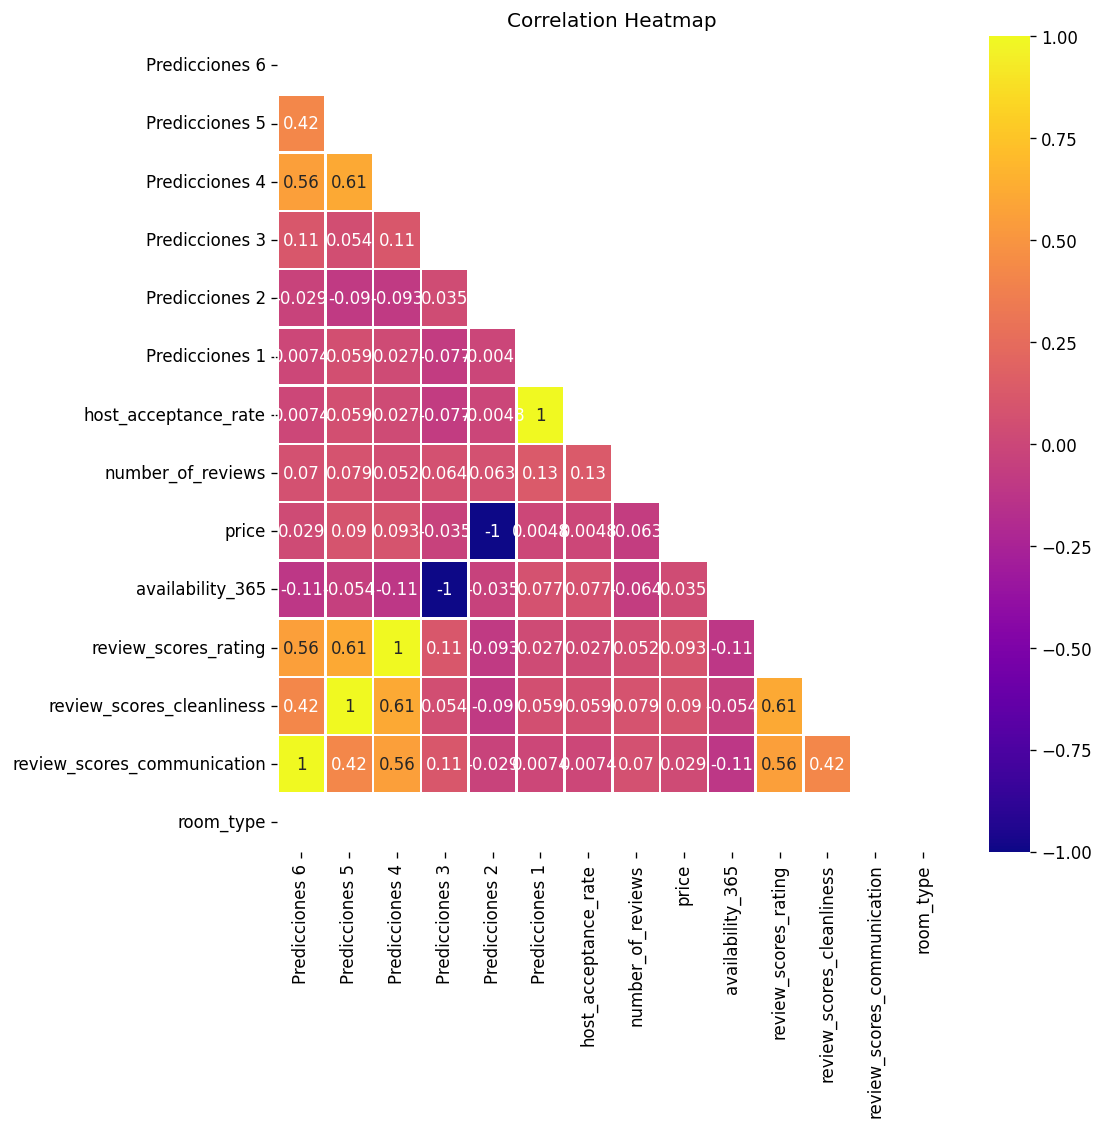

In [386]:
# Correlaciones
plt.figure(dpi=120, figsize=(9,9)) # resolution
mask = np.triu(np.ones_like(entire_home_final.corr(),dtype = bool))

sns.heatmap(entire_home_final.corr(),lw=1,cmap = 'plasma', mask=mask,  annot=True)
plt.title('Correlation Heatmap')

DataFrame private_room_final

In [387]:
private_room_final.corr()

,Predicciones 6,Predicciones 5,Predicciones 4,Predicciones 3,Predicciones 2,Predicciones 1,host_acceptance_rate,number_of_reviews,price,availability_365,review_scores_rating,review_scores_cleanliness,review_scores_communication,room_type
Predicciones 6,1.000000,0.415258,0.552260,0.101633,0.054718,-0.023534,-0.023534,0.052473,-0.054718,-0.101633,0.552260,0.415258,1.000000,NaN
Predicciones 5,0.415258,1.000000,0.593663,0.073735,-0.042917,0.005812,0.005812,0.084176,0.042917,-0.073735,0.593663,1.000000,0.415258,NaN
Predicciones 4,0.552260,0.593663,1.000000,0.121836,0.016224,-0.027325,-0.027325,0.072141,-0.016224,-0.121836,1.000000,0.593663,0.552260,NaN
Predicciones 3,0.101633,0.073735,0.121836,1.000000,0.095858,-0.038631,-0.038631,0.095369,-0.095858,-1.000000,0.121836,0.073735,0.101633,NaN
Predicciones 2,0.054718,-0.042917,0.016224,0.095858,1.000000,-0.045016,-0.045016,0.069018,-1.000000,-0.095858,0.016224,-0.042917,0.054718,NaN
Predicciones 1,-0.023534,0.005812,-0.027325,-0.038631,-0.045016,1.000000,1.000000,0.128325,0.045016,0.038631,-0.027325,0.005812,-0.023534,NaN
host_acceptance_rate,-0.023534,0.005812,-0.027325,-0.038631,-0.045016,1.000000,1.000000,0.128325,0.045016,0.038631,-0.027325,0.005812,-0.023534,NaN
number_of_reviews,0.052473,0.084176,0.072141,0.095369,0.069018,0.128325,0.128325,1.000000,-0.069018,-0.095369,0.072141,0.084176,0.052473,NaN
price,-0.054718,0.042917,-0.016224,-0.095858,-1.000000,0.045016,0.045016,-0.069018,1.000000,0.095858,-0.016224,0.042917,-0.054718,NaN
availability_365,-0.101633,-0.073735,-0.121836,-1.000000,-0.095858,0.038631,0.038631,-0.095369,0.095858,1.000000,-0.121836,-0.073735,-0.101633,NaN


Text(0.5, 1.0, 'Correlation Heatmap')

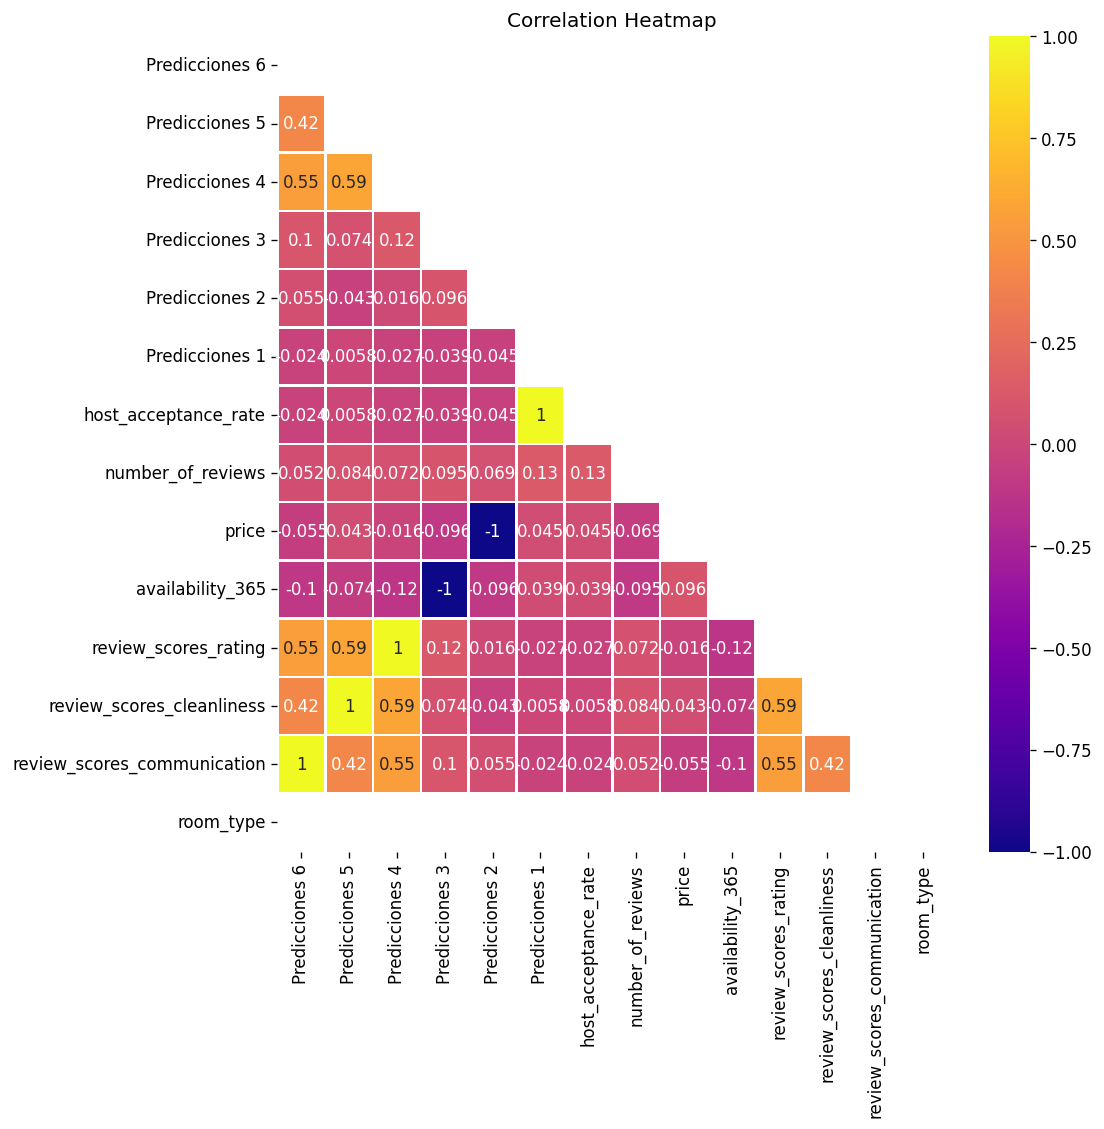

In [388]:
# Correlaciones
plt.figure(dpi=120, figsize=(9,9)) # resolution
mask = np.triu(np.ones_like(private_room_final.corr(),dtype = bool))

sns.heatmap(private_room_final.corr(),lw=1,cmap = 'plasma', mask=mask,  annot=True)
plt.title('Correlation Heatmap')

DataFrame hotel_room_final

In [389]:
hotel_room_final.corr()

,Predicciones 6,Predicciones 5,Predicciones 4,Predicciones 3,Predicciones 2,Predicciones 1,host_acceptance_rate,number_of_reviews,price,availability_365,review_scores_rating,review_scores_cleanliness,review_scores_communication,room_type
Predicciones 6,1.000000,0.402956,-0.450890,0.063884,0.024124,0.141891,0.141891,0.082861,-0.024124,0.063884,-0.450890,-0.402956,-1.000000,NaN
Predicciones 5,0.402956,1.000000,-0.522354,0.077735,0.099868,0.123539,0.123539,0.008165,-0.099868,0.077735,-0.522354,-1.000000,-0.402956,NaN
Predicciones 4,-0.450890,-0.522354,1.000000,-0.044200,-0.127115,-0.066568,-0.066568,0.085422,0.127115,-0.044200,1.000000,0.522354,0.450890,NaN
Predicciones 3,0.063884,0.077735,-0.044200,1.000000,-0.266822,0.061155,0.061155,0.098086,0.266822,1.000000,-0.044200,-0.077735,-0.063884,NaN
Predicciones 2,0.024124,0.099868,-0.127115,-0.266822,1.000000,0.000375,0.000375,0.074621,-1.000000,-0.266822,-0.127115,-0.099868,-0.024124,NaN
Predicciones 1,0.141891,0.123539,-0.066568,0.061155,0.000375,1.000000,1.000000,0.159413,-0.000375,0.061155,-0.066568,-0.123539,-0.141891,NaN
host_acceptance_rate,0.141891,0.123539,-0.066568,0.061155,0.000375,1.000000,1.000000,0.159413,-0.000375,0.061155,-0.066568,-0.123539,-0.141891,NaN
number_of_reviews,0.082861,0.008165,0.085422,0.098086,0.074621,0.159413,0.159413,1.000000,-0.074621,0.098086,0.085422,-0.008165,-0.082861,NaN
price,-0.024124,-0.099868,0.127115,0.266822,-1.000000,-0.000375,-0.000375,-0.074621,1.000000,0.266822,0.127115,0.099868,0.024124,NaN
availability_365,0.063884,0.077735,-0.044200,1.000000,-0.266822,0.061155,0.061155,0.098086,0.266822,1.000000,-0.044200,-0.077735,-0.063884,NaN


Text(0.5, 1.0, 'Correlation Heatmap')

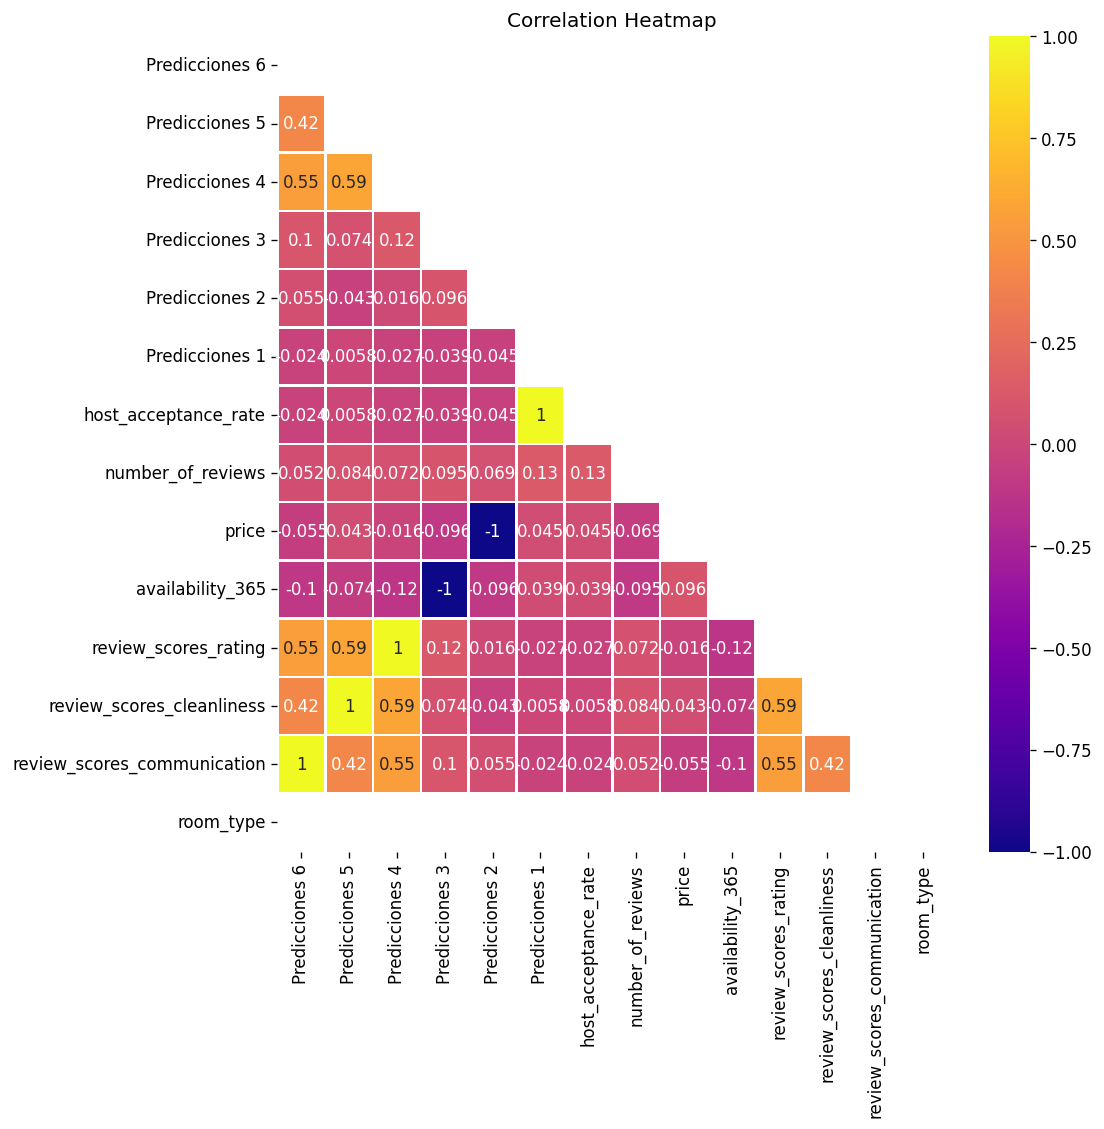

In [390]:
# Correlaciones
plt.figure(dpi=120, figsize=(9,9)) # resolution
mask = np.triu(np.ones_like(hotel_room_final.corr(),dtype = bool))

sns.heatmap(private_room_final.corr(),lw=1,cmap = 'plasma', mask=mask,  annot=True)
plt.title('Correlation Heatmap')

#Analisis para la ciudad de ATENAS


In [391]:
atenas= pd.read_csv("Atenas.csv")
atenas.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,25678448,sweet home in Athens 15 min from center and sea,186614918,Vasia,NaN,ΝΕΟΣ ΚΟΣΜΟΣ,37.942000,23.714530,Entire home/apt,43,1,273,2022-09-18,5.25,1,343,56,00000466773
1,36175508,📍Rooftop Studio near Metro Holargos - 5 Min Walk,62879164,Barbara,NaN,ΠΕΝΤΑΓΩΝΟ,38.004450,23.797210,Entire home/apt,89,2,17,2022-09-14,0.43,1,357,9,00001443600
2,14801587,The top rated (99.8% 5-star) stay in whole Ath...,92466538,Pantelis & Grigoria,NaN,ΠΕΤΡΑΛΩΝΑ,37.961530,23.701790,Entire home/apt,45,5,150,2022-09-16,2.05,2,187,12,00000068553
3,42384166,Practical Apartment,337177735,Dna,NaN,ΝΕΟΣ ΚΟΣΜΟΣ,37.948350,23.703270,Entire home/apt,35,2,30,2022-09-01,0.96,1,360,21,00001374706
4,664108377231910173,LOVELY 1-BEDROOM RENTAL UNIT IN HALANDRI,312554982,Tony,NaN,ΠΕΝΤΑΓΩΝΟ,38.006437,23.794922,Entire home/apt,31,3,0,NaN,NaN,1,169,0,00510309163


In [392]:
atenas = atenas[['minimum_nights','number_of_reviews','price','availability_365','calculated_host_listings_count','room_type']]
atenas.head()

,minimum_nights,number_of_reviews,price,availability_365,calculated_host_listings_count,room_type
0,1,273,43,343,1,Entire home/apt
1,2,17,89,357,1,Entire home/apt
2,5,150,45,187,2,Entire home/apt
3,2,30,35,360,1,Entire home/apt
4,3,0,31,169,1,Entire home/apt


In [393]:
atenas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12165 entries, 0 to 12164
Data columns (total 6 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   minimum_nights                  12165 non-null  int64 
 1   number_of_reviews               12165 non-null  int64 
 2   price                           12165 non-null  int64 
 3   availability_365                12165 non-null  int64 
 4   calculated_host_listings_count  12165 non-null  int64 
 5   room_type                       12165 non-null  object
dtypes: int64(5), object(1)
memory usage: 570.4+ KB


In [394]:
entire_atenas = atenas[atenas["room_type"] == "Entire home/apt"]
entire_atenas.head()

,minimum_nights,number_of_reviews,price,availability_365,calculated_host_listings_count,room_type
0,1,273,43,343,1,Entire home/apt
1,2,17,89,357,1,Entire home/apt
2,5,150,45,187,2,Entire home/apt
3,2,30,35,360,1,Entire home/apt
4,3,0,31,169,1,Entire home/apt


In [395]:
entire_atenas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10831 entries, 0 to 12164
Data columns (total 6 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   minimum_nights                  10831 non-null  int64 
 1   number_of_reviews               10831 non-null  int64 
 2   price                           10831 non-null  int64 
 3   availability_365                10831 non-null  int64 
 4   calculated_host_listings_count  10831 non-null  int64 
 5   room_type                       10831 non-null  object
dtypes: int64(5), object(1)
memory usage: 592.3+ KB


Tratamiento de nulos y outliers

In [396]:
valores_nulos_atenas=entire_atenas.isnull().sum()
valores_nulos_atenas

minimum_nights                    0
number_of_reviews                 0
price                             0
availability_365                  0
calculated_host_listings_count    0
room_type                         0
dtype: int64

In [397]:
#Método aplicando Cuartiles. Encuentro cuartiles 0.25 y 0.75
## DataFrame entire_home
y1=entire_atenas

percentile25=y1.quantile(0.25) #Q1
percentile75=y1.quantile(0.75) #Q3
iqr= percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 4.5*iqr
Limite_Inferior_iqr= percentile25 - 4.5*iqr
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite inferior permitido", Limite_Inferior_iqr)

Limite superior permitido minimum_nights                       6.5
number_of_reviews                  294.5
price                              331.0
availability_365                  1282.5
calculated_host_listings_count      50.5
dtype: float64
Limite inferior permitido minimum_nights                     -3.5
number_of_reviews                -235.5
price                            -189.0
availability_365                 -807.5
calculated_host_listings_count    -39.5
dtype: float64


In [398]:
entire_atenas_final= entire_atenas[(y1<=Limite_Superior_iqr)&(y1>=Limite_Inferior_iqr)]
entire_atenas_final

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  """Entry point for launching an IPython kernel.


,minimum_nights,number_of_reviews,price,availability_365,calculated_host_listings_count,room_type
0,1.0,273.0,43.0,343,1.0,NaN
1,2.0,17.0,89.0,357,1.0,NaN
2,5.0,150.0,45.0,187,2.0,NaN
3,2.0,30.0,35.0,360,1.0,NaN
4,3.0,0.0,31.0,169,1.0,NaN
...,...,...,...,...,...,...
12160,3.0,1.0,90.0,1,1.0,NaN
12161,3.0,3.0,35.0,0,6.0,NaN
12162,4.0,0.0,80.0,0,3.0,NaN
12163,4.0,0.0,60.0,0,1.0,NaN


In [399]:
#Reemplazamos valores atípicos (nulos) del dataframe con "mean" 
entire_atenas_final=entire_atenas_final.fillna(round(entire_atenas_final.mean(),1))
entire_atenas_final

,minimum_nights,number_of_reviews,price,availability_365,calculated_host_listings_count,room_type
0,1.0,273.0,43.0,343,1.0,NaN
1,2.0,17.0,89.0,357,1.0,NaN
2,5.0,150.0,45.0,187,2.0,NaN
3,2.0,30.0,35.0,360,1.0,NaN
4,3.0,0.0,31.0,169,1.0,NaN
...,...,...,...,...,...,...
12160,3.0,1.0,90.0,1,1.0,NaN
12161,3.0,3.0,35.0,0,6.0,NaN
12162,4.0,0.0,80.0,0,3.0,NaN
12163,4.0,0.0,60.0,0,1.0,NaN


In [428]:
entire_atenas_final.corr()

,Predicciones,minimum_nights,number_of_reviews,price,availability_365,calculated_host_listings_count,room_type
Predicciones,1.000000,-0.743104,0.085628,-0.357031,-0.310818,-0.283842,NaN
minimum_nights,-0.743104,1.000000,-0.063630,-0.118510,-0.131452,-0.187719,NaN
number_of_reviews,0.085628,-0.063630,1.000000,-0.030572,-0.026615,-0.024305,NaN
price,-0.357031,-0.118510,-0.030572,1.000000,0.121993,0.176646,NaN
availability_365,-0.310818,-0.131452,-0.026615,0.121993,1.000000,0.118284,NaN
calculated_host_listings_count,-0.283842,-0.187719,-0.024305,0.176646,0.118284,1.000000,NaN
room_type,NaN,NaN,NaN,NaN,NaN,NaN,NaN


REGRESION LINEAL MULTIPLE


In [400]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep_mul= entire_atenas_final[['minimum_nights', 'price','availability_365', 'calculated_host_listings_count']]
Var_Dep_mul= entire_atenas_final['number_of_reviews']

In [401]:
model_mul= LinearRegression()

In [402]:
#Ajustamos el modelo con las variables antes declaradas
model_mul.fit(X=Vars_Indep_mul, y=Var_Dep_mul)

LinearRegression()

In [403]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model_mul.__dict__

{'fit_intercept': True,
 'normalize': 'deprecated',
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['minimum_nights', 'price', 'availability_365',
        'calculated_host_listings_count'], dtype=object),
 'n_features_in_': 4,
 'coef_': array([-4.5597537 , -0.03530605, -0.0134346 , -0.16733724]),
 '_residues': 34196319.46828964,
 'rank_': 4,
 'singular_': array([12871.56150482,  5080.32369727,  1022.77947883,    96.11218602]),
 'intercept_': 55.35684379721724}

In [404]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model_mul.score(Vars_Indep_mul,Var_Dep_mul)

0.0073320793162899855

Modelo predictivo

In [405]:
#Predecimos los valores de total de accidentes a partir de las variables: "alcohol", "speeding" y "no_previous"
y_pred_mul= model_mul.predict(X=entire_atenas_final[['minimum_nights', 'price','availability_365', 'calculated_host_listings_count']])
y_pred_mul

array([44.50352628, 38.13160994, 28.1223591 , ..., 33.79133327,
       34.83212875, 45.99197108])

In [406]:
#Insertamos la columna de predicciones en el DataFrame
entire_atenas_final.insert(0, 'Predicciones', y_pred_mul)
entire_atenas_final

,Predicciones,minimum_nights,number_of_reviews,price,availability_365,calculated_host_listings_count,room_type
0,44.503526,1.0,273.0,43.0,343,1.0,NaN
1,38.131610,2.0,17.0,89.0,357,1.0,NaN
2,28.122359,5.0,150.0,45.0,187,2.0,NaN
3,39.997833,2.0,30.0,35.0,360,1.0,NaN
4,38.145311,3.0,0.0,31.0,169,1.0,NaN
...,...,...,...,...,...,...,...
12160,38.319266,3.0,1.0,90.0,1,1.0,NaN
12161,39.437847,3.0,3.0,35.0,0,6.0,NaN
12162,33.791333,4.0,0.0,80.0,0,3.0,NaN
12163,34.832129,4.0,0.0,60.0,0,1.0,NaN


In [407]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model_mul.score(X=Vars_Indep_mul, y=Var_Dep_mul)
coef_Deter

0.0073320793162899855

In [408]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.0856275616626445

#Analisis para la ciudad de Bangkok

In [409]:
bangkok= pd.read_csv("Bangkok.csv")
bangkok.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,45305964,Lumpini ville Nakhon in - River view studio Cozy,177103834,Thanat,NaN,Bang Sue,13.83689,100.50330,Entire home/apt,388,360,0,NaN,NaN,1,365,0,NaN
1,8975471,[Monthly] Plum Condominium Paholyothin 89,46549310,Chakree,NaN,Don Mueang,13.96994,100.61852,Private room,5000,300,0,NaN,NaN,1,362,0,NaN
2,27934,Nice room with superb city view,120437,Nuttee,NaN,Ratchathewi,13.75983,100.54134,Entire home/apt,2034,3,65,2020-01-06,0.51,2,362,0,NaN
3,27979,"Easy going landlord,easy place",120541,Emy,NaN,Bang Na,13.66818,100.61674,Private room,1405,1,0,NaN,NaN,2,358,0,NaN
4,31508092,Room for rent good and cheap,223483764,Huangseng,NaN,Bang Na,13.66075,100.57991,Private room,700,1,0,NaN,NaN,1,365,0,NaN


In [410]:
bangkok = bangkok[['minimum_nights','number_of_reviews','price','availability_365','calculated_host_listings_count','room_type']]
bangkok.head()

,minimum_nights,number_of_reviews,price,availability_365,calculated_host_listings_count,room_type
0,360,0,388,365,1,Entire home/apt
1,300,0,5000,362,1,Private room
2,3,65,2034,362,2,Entire home/apt
3,1,0,1405,358,2,Private room
4,1,0,700,365,1,Private room


In [411]:
bangkok.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16640 entries, 0 to 16639
Data columns (total 6 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   minimum_nights                  16640 non-null  int64 
 1   number_of_reviews               16640 non-null  int64 
 2   price                           16640 non-null  int64 
 3   availability_365                16640 non-null  int64 
 4   calculated_host_listings_count  16640 non-null  int64 
 5   room_type                       16640 non-null  object
dtypes: int64(5), object(1)
memory usage: 780.1+ KB


In [412]:
entire_bangkok = bangkok[bangkok["room_type"] == "Entire home/apt"]
entire_bangkok.head()

,minimum_nights,number_of_reviews,price,availability_365,calculated_host_listings_count,room_type
0,360,0,388,365,1,Entire home/apt
2,3,65,2034,362,2,Entire home/apt
6,7,0,1000,90,2,Entire home/apt
14,1,0,8500,365,1,Entire home/apt
18,2,3,910,365,2,Entire home/apt


In [413]:
entire_bangkok.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9107 entries, 0 to 16639
Data columns (total 6 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   minimum_nights                  9107 non-null   int64 
 1   number_of_reviews               9107 non-null   int64 
 2   price                           9107 non-null   int64 
 3   availability_365                9107 non-null   int64 
 4   calculated_host_listings_count  9107 non-null   int64 
 5   room_type                       9107 non-null   object
dtypes: int64(5), object(1)
memory usage: 498.0+ KB


Tratamiento de nulos y outliers

In [414]:
valores_nulos_bangkok=entire_bangkok.isnull().sum()
valores_nulos_bangkok

minimum_nights                    0
number_of_reviews                 0
price                             0
availability_365                  0
calculated_host_listings_count    0
room_type                         0
dtype: int64

In [415]:
#Método aplicando Cuartiles. Encuentro cuartiles 0.25 y 0.75
## DataFrame entire_home
y1=entire_bangkok

percentile25=y1.quantile(0.25) #Q1
percentile75=y1.quantile(0.75) #Q3
iqr= percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 4.5*iqr
Limite_Inferior_iqr= percentile25 - 4.5*iqr
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite inferior permitido", Limite_Inferior_iqr)

Limite superior permitido minimum_nights                     149.5
number_of_reviews                  115.5
price                             7547.0
availability_365                  1569.5
calculated_host_listings_count      83.5
dtype: float64
Limite inferior permitido minimum_nights                    -120.5
number_of_reviews                  -94.5
price                            -4493.0
availability_365                 -1120.5
calculated_host_listings_count     -66.5
dtype: float64


In [416]:
entire_bangkok_final= entire_bangkok[(y1<=Limite_Superior_iqr)&(y1>=Limite_Inferior_iqr)]
entire_bangkok_final

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  """Entry point for launching an IPython kernel.


,minimum_nights,number_of_reviews,price,availability_365,calculated_host_listings_count,room_type
0,NaN,0.0,388.0,365,1.0,NaN
2,3.0,65.0,2034.0,362,2.0,NaN
6,7.0,0.0,1000.0,90,2.0,NaN
14,1.0,0.0,NaN,365,1.0,NaN
18,2.0,3.0,910.0,365,2.0,NaN
...,...,...,...,...,...,...
16635,1.0,0.0,680.0,139,10.0,NaN
16636,1.0,1.0,499.0,263,1.0,NaN
16637,7.0,0.0,630.0,358,2.0,NaN
16638,6.0,78.0,4438.0,364,7.0,NaN


In [417]:
#Reemplazamos valores atípicos (nulos) del dataframe con "mean" 
entire_bangkok_final=entire_bangkok_final.fillna(round(entire_bangkok_final.mean(),1))
entire_bangkok_final

,minimum_nights,number_of_reviews,price,availability_365,calculated_host_listings_count,room_type
0,11.8,0.0,388.0,365,1.0,NaN
2,3.0,65.0,2034.0,362,2.0,NaN
6,7.0,0.0,1000.0,90,2.0,NaN
14,1.0,0.0,1681.3,365,1.0,NaN
18,2.0,3.0,910.0,365,2.0,NaN
...,...,...,...,...,...,...
16635,1.0,0.0,680.0,139,10.0,NaN
16636,1.0,1.0,499.0,263,1.0,NaN
16637,7.0,0.0,630.0,358,2.0,NaN
16638,6.0,78.0,4438.0,364,7.0,NaN


In [427]:
entire_bangkok_final.corr()

,Predicciones,minimum_nights,number_of_reviews,price,availability_365,calculated_host_listings_count,room_type
Predicciones,1.000000,-0.679672,0.125009,-0.195241,-0.634979,0.282606,NaN
minimum_nights,-0.679672,1.000000,-0.084965,-0.178158,-0.015446,0.011945,NaN
number_of_reviews,0.125009,-0.084965,1.000000,-0.024407,-0.079378,0.035328,NaN
price,-0.195241,-0.178158,-0.024407,1.000000,0.064790,-0.092032,NaN
availability_365,-0.634979,-0.015446,-0.079378,0.064790,1.000000,-0.097967,NaN
calculated_host_listings_count,0.282606,0.011945,0.035328,-0.092032,-0.097967,1.000000,NaN
room_type,NaN,NaN,NaN,NaN,NaN,NaN,NaN


REGRESION LINEAL MULTIPLE

In [418]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep_mul_bang= entire_bangkok_final[['minimum_nights', 'price','availability_365', 'calculated_host_listings_count']]
Var_Dep_mul_bang= entire_bangkok_final['number_of_reviews']

In [419]:
model_mul_bang= LinearRegression()

In [420]:
#Ajustamos el modelo con las variables antes declaradas
model_mul_bang.fit(X=Vars_Indep_mul_bang, y=Var_Dep_mul_bang)

LinearRegression()

In [421]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model_mul_bang.__dict__

{'fit_intercept': True,
 'normalize': 'deprecated',
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['minimum_nights', 'price', 'availability_365',
        'calculated_host_listings_count'], dtype=object),
 'n_features_in_': 4,
 'coef_': array([-0.11311459, -0.00065484, -0.0133784 ,  0.04420319]),
 '_residues': 4591595.5270186355,
 'rank_': 4,
 'singular_': array([110692.2917236 ,  12258.87192091,   1736.55514575,   1254.04985046]),
 'intercept_': 19.14080011026165}

In [422]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model_mul_bang.score(Vars_Indep_mul_bang,Var_Dep_mul_bang)

0.01562732032950398

Modelo predictivo

In [423]:
#Predecimos los valores de total de accidentes a partir de las variables: "alcohol", "speeding" y "no_previous"
y_pred_mul_bang= model_mul_bang.predict(X=entire_bangkok_final[['minimum_nights', 'price','availability_365', 'calculated_host_listings_count']])
y_pred_mul_bang

array([12.71305703, 12.71493966, 16.57850966, ..., 13.23538815,
       10.99562326, 13.96882208])

In [424]:
#Insertamos la columna de predicciones en el DataFrame
entire_bangkok_final.insert(0, 'Predicciones', y_pred_mul_bang)
entire_bangkok_final

,Predicciones,minimum_nights,number_of_reviews,price,availability_365,calculated_host_listings_count,room_type
0,12.713057,11.8,0.0,388.0,365,1.0,NaN
2,12.714940,3.0,65.0,2034.0,362,2.0,NaN
6,16.578510,7.0,0.0,1000.0,90,2.0,NaN
14,13.087792,1.0,0.0,1681.3,365,1.0,NaN
18,13.523958,2.0,3.0,910.0,365,2.0,NaN
...,...,...,...,...,...,...,...
16635,17.164829,1.0,0.0,680.0,139,10.0,NaN
16636,15.226605,1.0,1.0,499.0,263,1.0,NaN
16637,13.235388,7.0,0.0,630.0,358,2.0,NaN
16638,10.995623,6.0,78.0,4438.0,364,7.0,NaN


In [425]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter_bang=model_mul_bang.score(X=Vars_Indep_mul_bang, y=Var_Dep_mul_bang)
coef_Deter_bang

0.01562732032950398

In [426]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl_bang=np.sqrt(coef_Deter_bang)
coef_Correl_bang

0.12500928097347005